# Web Scraping of Data Analyst Jobs Analysis 

## 3. Data Cleaning & Preparation for analysis  
- Read back he the downloaded data   'data_analyst_28_04_24.csv' file for analysis
- Display all rows of the dataframe & investigate 

In [2]:
#importing libraries
import pandas as pd
pd.options.display.max_rows = None

df_original  = pd.read_csv('data_analyst_28_04_24.csv')
df_original.head(2)


,title,date,employer,location,salary,working_hours,job_weblink,job_description
0,Data Analyst,28 March,SES Water,Redhill,"£28,000 - £32,000 per annum","Permanent, full-time",https://www.reed.co.uk/jobs/data-analyst/52392...,If you are a Data Analyst with a commitment to...
1,Business Data Analyst/Data Analyst,3 days ago,Deutsche Bank,Birmingham,Competitive salary,"Contract, full-time",https://www.reed.co.uk/jobs/business-data-anal...,AMS is the world's leading provider of Talent ...


In [7]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2874 entries, 0 to 2873
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            2874 non-null   object
 1   date             2874 non-null   object
 2   employer         2874 non-null   object
 3   location         2874 non-null   object
 4   salary           2874 non-null   object
 5   working_hours    2874 non-null   object
 6   job_weblink      2874 non-null   object
 7   job_description  2874 non-null   object
dtypes: object(8)
memory usage: 179.8+ KB


### Check for duplicate 

In [4]:
# No duplicated values in df_original 
df_original.duplicated().sum()

0

In [3]:
df_original.columns

Index(['title', 'date', 'employer', 'location', 'salary', 'working_hours',
       'job_weblink', 'job_description'],
      dtype='object')

### The data contains  jobs unrelated to Data Analyst (like Commercial Underwriter, etc)
- Filter out the title column to extract only jobs conatining data analyst and create a dataframe 


In [6]:
# Select only Data Analyst jobs
df_data_analyst = df_original.loc[df_original.title.str.contains('Data Analyst'), 
                         ['title', 'date', 'employer', 'location', 'salary', 'working_hours']]
df_data_analyst.head(2)


,title,date,employer,location,salary,working_hours
0,Data Analyst,28 March,SES Water,Redhill,"£28,000 - £32,000 per annum","Permanent, full-time"
1,Business Data Analyst/Data Analyst,3 days ago,Deutsche Bank,Birmingham,Competitive salary,"Contract, full-time"


In [12]:
df_data_analyst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 523 entries, 0 to 2863
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          523 non-null    object
 1   date           523 non-null    object
 2   employer       523 non-null    object
 3   location       523 non-null    object
 4   salary         523 non-null    object
 5   working_hours  523 non-null    object
dtypes: object(6)
memory usage: 28.6+ KB


### Check for duplicate values in df_data_analyst 

In [6]:
# 229 duplicate values 
df_data_analyst.duplicated().sum()


229

In [7]:
df_data_analyst[df_data_analyst.duplicated()].head()


,title,date,employer,location,salary,working_hours
4,Data Analyst,28 March,SES Water,Redhill,"£28,000 - £32,000 per annum","Permanent, full-time"
5,Business Data Analyst/Data Analyst,3 days ago,Deutsche Bank,Birmingham,Competitive salary,"Contract, full-time"
27,Data Analyst,28 March,SES Water,Redhill,"£28,000 - £32,000 per annum","Permanent, full-time"
28,Business Data Analyst/Data Analyst,3 days ago,Deutsche Bank,Birmingham,Competitive salary,"Contract, full-time"
33,Data Analyst Trainee,16 January,ITonlinelearning Recruitment,London,Training Course,"Permanent, full-time"


In [9]:
df_data_analyst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 523 entries, 0 to 2863
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          523 non-null    object
 1   date           523 non-null    object
 2   employer       523 non-null    object
 3   location       523 non-null    object
 4   salary         523 non-null    object
 5   working_hours  523 non-null    object
dtypes: object(6)
memory usage: 28.6+ KB


### Remove duplicated rows

In [8]:
# remove 229 duplicated values from df_data_analyst= 
df_data_analyst.drop_duplicates(inplace=True)


In [9]:
df_data_analyst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 2157
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          294 non-null    object
 1   date           294 non-null    object
 2   employer       294 non-null    object
 3   location       294 non-null    object
 4   salary         294 non-null    object
 5   working_hours  294 non-null    object
dtypes: object(6)
memory usage: 16.1+ KB


### Values count of the title with Data Analyst role

In [7]:
df_data_analyst.title.value_counts().head(15)

title
Data Analyst                                                    159
Business Data Analyst/Data Analyst                              108
Data Analyst Trainee                                             85
Senior Data Analyst                                              15
Senior Marketing Data Analyst E-Commerce                          5
Product Data Analyst                                              4
Junior Data Analyst                                               4
Entry-Level Data Analyst                                          3
Data Analyst                                                      3
Marketing Data Analyst                                            3
Behavioural Data Analyst                                          3
Customer Data Analyst                                             3
Geospatial Data Analyst                                           3
CAD Data Analyst                                                  2
Senior Business/Data Analyst - Sql, Excel,

### Check for data types and missing values of each columns  


In [13]:
# no missing values 
df_data_analyst.isna().sum()


title            0
date             0
employer         0
location         0
salary           0
working_hours    0
dtype: int64

# Date column
- The  "date" column values treated as strings (objects) & needs changing to datetime format 

In [10]:
# Explore unique values
unique = df_data_analyst["date"].unique()
unique

array(['28 March', '3 days ago', '18 April', '9 April', '24 January',
       '2 January', '15 April', '29 January', '23 January', '27 December',
       '3 January', '25 January', '16 January', '8 January', '9 January',
       '4 January', '10 January', '15 January', '12 January',
       '26 January', '22 January', '8 December', '28 December',
       '5 January', '2 days ago', '12 April', '4 days ago', '17 April',
       '21 March', '8 April', '16 April', '5 days ago', 'Yesterday',
       '30 March', '22 March', '10 April', '3 April', '18 March',
       '11 April', '27 Feburary', '19 April', '19 March', '5 June',
       '24 March', '29 March', '4 April', '20 April', '5 April',
       '1 April', '2 April', '22 April', '27 March', '12 March',
       '17 March', '13 Feburary', '20 March', '26 March', '5 March'],
      dtype=object)

## The 'date' column is string and has different formats of values 
### The next task

* Change days ago , yesterday to propper date formats
* Extract the number of dates from 'days ago' then calculate the date from the scrapping date using datetime & timedelta functions
* Replace days ago with the relevant date before the date scraping the website ('28 April 2024')
* Replace 'Yesterday' with the day before from the scraping date ('27 April 2024')
* Add 2023 to months- like June & December
* Add 2024 to month - January, February, March and April  
* Change the "date" column to date format

In [8]:
date_counts = df_data_analyst.date.value_counts()
date_counts.head(15)

date
3 days ago    118
28 March      110
15 April       20
2 days ago     18
18 April       14
22 March       12
5 days ago     11
16 January     11
9 April        10
23 January     10
17 April        9
19 March        8
19 April        8
16 April        8
4 days ago      8
Name: count, dtype: int64

In [24]:
date_counts.index

Index(['15 April', '2 days ago', '18 April', '22 March', '5 days ago',
       '9 April', '3 days ago', '23 January', '17 April', '16 January',
       '19 March', '16 April', '12 April', '19 April', '8 April', '29 January',
       '5 April', '27 March', '21 March', '3 April', '2 January', '4 days ago',
       '10 April', 'Yesterday', '24 January', '11 April', '20 March',
       '27 December', '4 January', '10 January', '18 March', '22 January',
       '4 April', '3 January', '2 April', '28 March', '9 January',
       '28 December', '26 March', '25 January', '24 March', '20 April',
       '22 April', '30 March', '13 Feburary', '17 March', '12 March',
       '8 January', '15 January', '1 April', '5 January', '12 January',
       '29 March', '5 June', '26 January', '8 December', '27 Feburary',
       '5 March'],
      dtype='object', name='date')

### Check how many 'Yesterday' is in the date column 

In [25]:
#Count how many times 'Yesterday' appears in "date" column 
print(df_data_analyst["date"].value_counts()['Yesterday'])


5


In [26]:
# no hrs or hr ago (none)
df_data_analyst["date"].str.match('.*hr').sum()#]["date"]


0

### Check how many 'days ago' are in the date column 

In [12]:
# there are 44 days or weeks ago 
df_data_analyst["date"].str.match('.*ago').sum()


44

In [10]:
# display values containing 'ago'
df_data_analyst.loc[df_data_analyst["date"].str.match('.*ago'), ["date"]].head(10)


,date
1,3 days ago
5,3 days ago
28,3 days ago
55,3 days ago
72,3 days ago
82,3 days ago
99,3 days ago
100,2 days ago
103,4 days ago
109,3 days ago


In [16]:
# Find  occurrence of each values containing 'ago'
df_data_analyst.loc[df_data_analyst["date"].str.match('.*ago'), ["date"]].value_counts()


date      
2 days ago    17
5 days ago    11
3 days ago    10
4 days ago     6
Name: count, dtype: int64

In [17]:
# Extract the indexes of the values containing 'ago'
df_data_analyst.loc[df_data_analyst["date"].str.match('.*ago'), ["date"]].index


Index([   1,   72,  100,  103,  111,  115,  116,  120,  121,  123,  131,  156,
        164,  165,  180,  185,  191,  201,  203,  207,  221,  223,  234,  236,
        237,  241,  245,  255,  258,  262,  267,  281,  282,  290,  320,  334,
        336,  338,  343,  350, 1421, 1846, 2145, 2150],
      dtype='int64')

### Select few values from the 'date' column to work on

In [1]:
import pandas as pd
import pandas as pd
import datetime

pd.options.display.max_rows = None


df_original  = pd.read_csv('data_analyst_28_04_24.csv')

df_data_analyst = df_original.loc[df_original.title.str.contains('Data Analyst'), 
                         ['title', 'date', 'employer', 'location', 'salary', 'working_hours']]

# remove 229 duplicated values from df_data_analyst= 
df_data_analyst.drop_duplicates(inplace=True)

df_data_analyst.head(2)


,title,date,employer,location,salary,working_hours
0,Data Analyst,28 March,SES Water,Redhill,"£28,000 - £32,000 per annum","Permanent, full-time"
1,Business Data Analyst/Data Analyst,3 days ago,Deutsche Bank,Birmingham,Competitive salary,"Contract, full-time"


In [2]:
date_original  =  df_data_analyst.loc[[ 1, 100, 121, 103], "date"]
date_original.head()


1      3 days ago
100    2 days ago
121    5 days ago
103    4 days ago
Name: date, dtype: object

In [38]:
type(date_original)


pandas.core.series.Series

In [4]:
# Indes of the 'date'  column Series
date_original.index


Index([1, 100, 121, 103], dtype='int64')

In [40]:
# # Values of the 'date'  column Series
date_original.values


array(['3 days ago', '2 days ago', '5 days ago', '4 days ago'],
      dtype=object)

### Series to  dataframe

In [3]:
#create a dict and pass the series the data param to the dataframe constructor
df_date_original = pd.DataFrame({'index_original':date_original.index, 'date_original':date_original.values})
df_date_original.head()


,index_original,date_original
0,1,3 days ago
1,100,2 days ago
2,121,5 days ago
3,103,4 days ago


In [4]:
# Save 'df_date_original' as csv file 'date_test.csv'
df_date_original.to_csv('date_test.csv', index=None)


In [5]:
import pandas as pd
import datetime

pd.options.display.max_rows = None


In [6]:
# Load 'date_test.csv'
df_date_test  = pd.read_csv('date_test.csv')
df_date_test


,index_original,date_original
0,1,3 days ago
1,100,2 days ago
2,121,5 days ago
3,103,4 days ago


In [7]:
df_date_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index_original  4 non-null      int64 
 1   date_original   4 non-null      object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [45]:
df_date_test.columns

Index(['index_original', 'date_original'], dtype='object')

In [8]:

dates_added = []
days_ago =[]
date_list = []

for i in df_date_test['date_original']:
                      if  "days ago" in i:
                            
                        # select the first (index zero)
                        no_days = i[0]

                        days_ago.append(int(no_days))
days_ago


[3, 2, 5, 4]

In [9]:
# list comprehension alternative to the above
no_days = [i[0] for i in df_date_test['date_original'] if  "days ago" in i]
no_days


['3', '2', '5', '4']

In [11]:
day_ago =[]
for i in no_days:
    day_ago.append(int(i))
day_ago


[3, 2, 5, 4]

In [12]:
da_ago = [int(i) for i in no_days]
da_ago


[3, 2, 5, 4]

In [15]:
scrapping_date  =datetime.datetime.strptime('28 Apr 2024' , '%d %b %Y')
scrapping_date

datetime.datetime(2024, 4, 28, 0, 0)

In [7]:
# Transforming "days ago"
day_ago = []
dates = []
for i in df_date_test['date_original']:

    if  "days ago" in i:

        # select the first (index zero)
        no_days = i[0]
        day_ago.append(int(no_days))

        # specify the date scrapped the website to '27 April 2024' 
        scrapping_date =datetime.datetime.strptime('27 April 2024' , "%d %B %Y") # '%d %b %Y')

        for e in day_ago:
            d = datetime.timedelta(days = e)
            a = (scrapping_date - d).strftime("%d %B %Y") 
        dates.append(a)


# Create a 'date_transferred' column          
df_date_test['date_transferred'] = dates 

df_date_test


,index_original,date_original,date_transferred
0,1,3 days ago,24 April 2024
1,100,2 days ago,25 April 2024
2,121,5 days ago,22 April 2024
3,103,4 days ago,23 April 2024


In [17]:
dates

['24 April 2024', '25 April 2024', '22 April 2024', '23 April 2024']

In [19]:
df_date_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index_original    4 non-null      int64 
 1   date_original     4 non-null      object
 2   date_transferred  4 non-null      object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [8]:
# 'date_transferred' column is treated as an object 
df_date_test['date_transferred'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 4 entries, 0 to 3
Series name: date_transferred
Non-Null Count  Dtype 
--------------  ----- 
4 non-null      object
dtypes: object(1)
memory usage: 160.0+ bytes


In [9]:
df_date_test['date_transferred'].dtype

dtype('O')

### 'date_original' column is treated as string (object) Change it to Datetime format  

In [10]:
# specify the format (format = "%d/%m/%y")
df_date_test['date_transferred'] = pd.to_datetime(df_date_test['date_transferred'])#, format = "%d/%m/%y")


In [11]:
df_date_test['date_transferred'].dtype

dtype('<M8[ns]')

In [12]:
df_date_test['date_transferred'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4 entries, 0 to 3
Series name: date_transferred
Non-Null Count  Dtype         
--------------  -----         
4 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 160.0 bytes


In [13]:
df_date_test

,index_original,date_original,date_transferred
0,1,3 days ago,2024-04-24
1,100,2 days ago,2024-04-25
2,121,5 days ago,2024-04-22
3,103,4 days ago,2024-04-23


# Next work
* Extract Days of the week and their number's 
* Use pandas.Series.dt.day_name()

In [14]:
#df_date_date_test['date_original'].dt.day_name()
df_date_test['date_transferred'].dt.day_name()


0    Wednesday
1     Thursday
2       Monday
3      Tuesday
Name: date_transferred, dtype: object

In [15]:
# add 'day_of_week' as a column 
df_date_test['day_of_week'] = df_date_test['date_transferred'].dt.day_name()
df_date_test


,index_original,date_original,date_transferred,day_of_week
0,1,3 days ago,2024-04-24,Wednesday
1,100,2 days ago,2024-04-25,Thursday
2,121,5 days ago,2024-04-22,Monday
3,103,4 days ago,2024-04-23,Tuesday


## Save the file as csv

In [16]:
# Save 'df_date_original' as csv file 'date_test.csv'
df_date_test.to_csv('date_date_test.csv', index=None)

## Start from here 2

In [17]:
import pandas as pd
import datetime

pd.options.display.max_rows = None


In [18]:
df_date_date_test = pd.read_csv('date_date_test.csv')
df_date_date_test

,index_original,date_original,date_transferred,day_of_week
0,1,3 days ago,2024-04-24,Wednesday
1,100,2 days ago,2024-04-25,Thursday
2,121,5 days ago,2024-04-22,Monday
3,103,4 days ago,2024-04-23,Tuesday


In [19]:
df_date_date_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index_original    4 non-null      int64 
 1   date_original     4 non-null      object
 2   date_transferred  4 non-null      object
 3   day_of_week       4 non-null      object
dtypes: int64(1), object(3)
memory usage: 256.0+ bytes


In [20]:
df_date_date_test.day_of_week.value_counts()


day_of_week
Wednesday    1
Thursday     1
Monday       1
Tuesday      1
Name: count, dtype: int64

## Months to datetime format ['March','April', 'June',  'December', 'January']

In [21]:
#importing libraries
import pandas as pd

df_original  = pd.read_csv('data_analyst_28_04_24.csv')

df_data_analyst = df_original.loc[df_original.title.str.contains('Data Analyst'), 
                         ['title', 'date', 'employer', 'location', 'salary', 'working_hours']]

# remove 229 duplicated values from df_data_analyst= 
df_data_analyst.drop_duplicates(inplace=True)

df_data_analyst.head(2)


,title,date,employer,location,salary,working_hours
0,Data Analyst,28 March,SES Water,Redhill,"£28,000 - £32,000 per annum","Permanent, full-time"
1,Business Data Analyst/Data Analyst,3 days ago,Deutsche Bank,Birmingham,Competitive salary,"Contract, full-time"


In [22]:
df_data_analyst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 2157
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          294 non-null    object
 1   date           294 non-null    object
 2   employer       294 non-null    object
 3   location       294 non-null    object
 4   salary         294 non-null    object
 5   working_hours  294 non-null    object
dtypes: object(6)
memory usage: 16.1+ KB


In [23]:
df_data_analyst.columns


Index(['title', 'date', 'employer', 'location', 'salary', 'working_hours'], dtype='object')

In [35]:
df_data_analyst.date.unique()

array(['28 March', '3 days ago', '18 April', '9 April', '24 January',
       '2 January', '15 April', '29 January', '23 January', '27 December',
       '3 January', '25 January', '16 January', '8 January', '9 January',
       '4 January', '10 January', '15 January', '12 January',
       '26 January', '22 January', '8 December', '28 December',
       '5 January', '2 days ago', '12 April', '4 days ago', '17 April',
       '21 March', '8 April', '16 April', '5 days ago', 'Yesterday',
       '30 March', '22 March', '10 April', '3 April', '18 March',
       '11 April', '27 Feburary', '19 April', '19 March', '5 June',
       '24 March', '29 March', '4 April', '20 April', '5 April',
       '1 April', '2 April', '22 April', '27 March', '12 March',
       '17 March', '13 Feburary', '20 March', '26 March', '5 March'],
      dtype=object)

In [26]:
month_original = df_data_analyst.loc[[0, 2, 166, 39, 78 ], 'date']
month_original


0         28 March
2         18 April
166         5 June
39      24 January
78     28 December
Name: date, dtype: object

### Series to dataframe

In [27]:
#create a dict and pass the series the data param to the dataframe constructor
df_month_original = pd.DataFrame({'index_month':month_original.index, 'month_original':month_original.values})
df_month_original


,index_month,month_original
0,0,28 March
1,2,18 April
2,166,5 June
3,39,24 January
4,78,28 December


### Yesterday 

In [28]:
print(df_data_analyst[df_data_analyst['date']=='Yesterday'].index)

Index([122, 161, 218, 247, 304], dtype='int64')


## Unique values 

## Select indexes of unique values

In [32]:
# Extract the indexes of the values containing 'ago'
print(df_data_analyst.loc[df_data_analyst["date"].str.match('.*ago'), ["date"]].index)
print('-'*50)
print('-'*50)
print(df_data_analyst[df_data_analyst['date']=='Yesterday'].index)
print('-'*50)
print('-'*50)

print(df_data_analyst.loc[df_data_analyst["date"].str.match('.*days ago'), ["date"]].index)


Index([   1,   72,  100,  103,  111,  115,  116,  120,  121,  123,  131,  156,
        164,  165,  180,  185,  191,  201,  203,  207,  221,  223,  234,  236,
        237,  241,  245,  255,  258,  262,  267,  281,  282,  290,  320,  334,
        336,  338,  343,  350, 1421, 1846, 2145, 2150],
      dtype='int64')
--------------------------------------------------
--------------------------------------------------
Index([122, 161, 218, 247, 304], dtype='int64')
--------------------------------------------------
--------------------------------------------------
Index([   1,   72,  100,  103,  111,  115,  116,  120,  121,  123,  131,  156,
        164,  165,  180,  185,  191,  201,  203,  207,  221,  223,  234,  236,
        237,  241,  245,  255,  258,  262,  267,  281,  282,  290,  320,  334,
        336,  338,  343,  350, 1421, 1846, 2145, 2150],
      dtype='int64')


### Create a Dataframe using unique values 

In [33]:
df_unique = df_data_analyst.loc[[0, 2, 166, 39, 78, 269, 143, 247, 304,  1, 111, 103, 131], 'date']
df_unique

0         28 March
2         18 April
166         5 June
39      24 January
78     28 December
269    13 Feburary
143    27 Feburary
247      Yesterday
304      Yesterday
1       3 days ago
111     2 days ago
103     4 days ago
131     5 days ago
Name: date, dtype: object

### Series to dataframe

In [34]:
#create a dict and pass the series the data param to the dataframe constructor
df_unique_test = pd.DataFrame({'index_unique':df_unique.index, 'unique_original':df_unique.values})
df_unique_test

,index_unique,unique_original
0,0,28 March
1,2,18 April
2,166,5 June
3,39,24 January
4,78,28 December
5,269,13 Feburary
6,143,27 Feburary
7,247,Yesterday
8,304,Yesterday
9,1,3 days ago


In [35]:
df_unique_test.columns

Index(['index_unique', 'unique_original'], dtype='object')

In [4]:
df_unique_test.unique_original.unique()

array(['28 March', '18 April', '5 June', '24 January', '28 December',
       '13 Feburary', '27 Feburary', 'Yesterday', '3 days ago',
       '2 days ago', '4 days ago', '5 days ago'], dtype=object)

### The next work order is important beacuse of adding the years:
- First Add 2023 to months ['June',  'December'] and 2024 to m['January', 'February', 'March', 'April']
- Transforming 'days_ago' to relevant dates
- Transforming 'Yesterday' to relevant dates


## Add 2023 and 2024 to months 

In [50]:
def transformer(df_unique_test):
    
    df_unique_test['original_copy']= df_unique_test['unique_original']
    
    # Adding 2023 to other months 'June' &  'December' 
    months_2023 = ['June',  'December']
    
    for month in months_2023:
        df_unique_test.loc[df_unique_test['original_copy'].str.contains(month), 'original_copy'] += ' 2023'

    # Adding 2024 to January', 'February', 'March' & 'April'
    months_2024 = ['January', 'Feburary', 'March', 'April']
    
    for month in months_2024:
        df_unique_test.loc[df_unique_test['original_copy'].str.contains(month),'original_copy'] += ' 2024'
    
    return df_unique_test
        

transformer(df_unique_test)


,index_unique,unique_original,original_copy
0,0,28 March,28 March 2024
1,2,18 April,18 April 2024
2,166,5 June,5 June 2023
3,39,24 January,24 January 2024
4,78,28 December,28 December 2023
5,269,13 Feburary,13 Feburary 2024
6,143,27 Feburary,27 Feburary 2024
7,247,26 April 2024,26 April 2024 2024
8,304,26 April 2024,26 April 2024 2024
9,1,3 days ago,3 days ago


### Transforming 'days_ago' to relevant dates

In [4]:
day_ago =[]

for i in df_unique_test['unique_original']:
    if  "days ago" in i:
        # select the first (index zero)
        no_days = i[0]
        day_ago.append(int(no_days))
    
day_ago


[3, 2, 4, 5]

In [5]:
days_list = []


 # specify the date scrapped the website to '27 April 2024' 
scrapping_date =datetime.datetime.strptime('27 April 2024' , "%d %B %Y") # '%d %b %Y')

for e in day_ago:
    d = datetime.timedelta(days = e)
    a = (scrapping_date - d).strftime("%d %B %Y") 
    days_list.append(a)
    
print(days_list)
        

['24 April 2024', '25 April 2024', '23 April 2024', '22 April 2024']


### Combine the the above and  apply using a function 

In [51]:

def days_months(item):
    df_unique_test['original_copy']= df_unique_test['unique_original']
    
    date_list = []
    day_ago =[]

    for i in df_unique_test['unique_original']:


        if  "days ago" in i:

            # select the first (index zero)
            no_days = i[0]
            day_ago.append(int(no_days))

            # specify the date scrapped the website to '27 April 2024' 
            scrapping_date =datetime.datetime.strptime('27 April 2024' , "%d %B %Y") # '%d %b %Y')

            for e in day_ago:
                d = datetime.timedelta(days = e)
                a = (scrapping_date - d).strftime("%d %B %Y")
          

            # Substitute each values of i (days_ ago) with a (proper date before scrapping the website)
            df_unique_test.loc[df_unique_test['original_copy']== i, 'original_copy']= a

    

    return df_unique_test


days_months(df_unique_test)



,index_unique,unique_original,original_copy
0,0,28 March,28 March
1,2,18 April,18 April
2,166,5 June,5 June
3,39,24 January,24 January
4,78,28 December,28 December
5,269,13 Feburary,13 Feburary
6,143,27 Feburary,27 Feburary
7,247,26 April 2024,26 April 2024
8,304,26 April 2024,26 April 2024
9,1,3 days ago,24 April 2024


### Alternative method to the above

## Transforming 'Yesterday' to relevant dates

In [46]:
# Changing 'Yesterday' to the daate before scarpping date ('27 April 2024')  '26 April 2024'
df_unique_test.loc[df_unique_test['original_copy']  == 'Yesterday', 'original_copy' ] = '26 April 2024'
df_unique_test


,index_unique,unique_original,original_copy
0,0,28 March,28 March
1,2,18 April,18 April
2,166,5 June,5 June
3,39,24 January,24 January
4,78,28 December,28 December
5,269,13 Feburary,13 Feburary
6,143,27 Feburary,27 Feburary
7,247,26 April 2024,26 April 2024
8,304,26 April 2024,26 April 2024
9,1,3 days ago,24 April 2024


### 'original_copy' column is treated as string(object)

In [47]:
df_unique_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index_unique     13 non-null     int64 
 1   unique_original  13 non-null     object
 2   original_copy    13 non-null     object
dtypes: int64(1), object(2)
memory usage: 440.0+ bytes


In [48]:
# 'Feburary' misspelt on the website replace it with 'February'
df_unique_test['original_copy'] = df_unique_test['original_copy'].str.replace('Feburary', 'February')
df_unique_test


,index_unique,unique_original,original_copy
0,0,28 March,28 March
1,2,18 April,18 April
2,166,5 June,5 June
3,39,24 January,24 January
4,78,28 December,28 December
5,269,13 Feburary,13 February
6,143,27 Feburary,27 February
7,247,26 April 2024,26 April 2024
8,304,26 April 2024,26 April 2024
9,1,3 days ago,24 April 2024


### Changing 'original_copy' column to datetime format

### PUTTING ALL TOGETTHER

In [53]:
import pandas as pd
import numpy as np
import datetime

pd.options.display.max_rows = None

df_unique_test = pd.read_csv('unique_original.csv')


def days_months_transformer(item):
    
    df_unique_test['original_copy']= df_unique_test['unique_original']
    
    date_list = []
    day_ago =[]

    # Adding 2023 to other months 'June' &  'December' 
    months_2023 = ['June',  'December']
    
    for month in months_2023:
        df_unique_test.loc[df_unique_test['original_copy'].str.contains(month), 'original_copy'] += ' 2023'

    # Adding 2024 to January', 'February', 'March' & 'April'
    months_2024 = ['January', 'Feburary', 'March', 'April']
    
    for month in months_2024:
        df_unique_test.loc[df_unique_test['original_copy'].str.contains(month),'original_copy'] += ' 2024'
    
    # Transforming "days ago"
    for i in df_unique_test['original_copy']:

        if  "days ago" in i:

            # select the first (index zero)
            no_days = i[0]
            day_ago.append(int(no_days))

            # specify the date scrapped the website to '27 April 2024' 
            scrapping_date =datetime.datetime.strptime('27 April 2024' , "%d %B %Y") # '%d %b %Y')

            for e in day_ago:
                d = datetime.timedelta(days = e)
                a = (scrapping_date - d).strftime("%d %B %Y") 

            # Substitute each values of i (days_ ago) with a (proper date before scrapping the website)
            df_unique_test.loc[df_unique_test['original_copy']  == i, 'original_copy'] =  a

    
    # Changing 'Yesterday' to the daate before scarpping date ('27 April 2024')  '26 April 2024'
    df_unique_test.loc[df_unique_test['original_copy']  == 'Yesterday', 'original_copy' ] = '26 April 2024'
    
    # 'Feburary' misspelt on the website replace it with 'February'
    df_unique_test['original_copy'] = df_unique_test['original_copy'].str.replace('Feburary', 'February')
    
    #change to datetime format 
    df_unique_test['original_copy'] = pd.to_datetime(df_unique_test['original_copy'])
    
    # Extract  days of the week and create a column 
    df_unique_test['day_of_week'] = df_unique_test['original_copy'].dt.day_name()
    
    # save the data as csv file format 
    df_unique_test.to_csv('date_completed.csv', index=None)
    
    return df_unique_test
    

days_months_transformer(df_unique_test)


,index_unique,unique_original,original_copy,day_of_week
0,4,28 March,2024-03-28,Thursday
1,2,18 April,2024-04-18,Thursday
2,166,5 June,2023-06-05,Monday
3,39,24 January,2024-01-24,Wednesday
4,78,28 December,2023-12-28,Thursday
5,269,13 Feburary,2024-02-13,Tuesday
6,143,27 Feburary,2024-02-27,Tuesday
7,247,Yesterday,2024-04-26,Friday
8,304,Yesterday,2024-04-26,Friday
9,28,3 days ago,2024-04-24,Wednesday


## Applying on  'df_data_analyst' dataset

In [54]:
import pandas as pd
import numpy as np
import datetime

pd.options.display.max_rows = None

#importing libraries
import pandas as pd

df_original  = pd.read_csv('data_analyst_28_04_24.csv')

df_data_analyst = df_original.loc[df_original.title.str.contains('Data Analyst'), 
                         ['title', 'date', 'employer', 'location', 'salary', 'working_hours']]

# remove 229 duplicated values from df_data_analyst= 
df_data_analyst.drop_duplicates(inplace=True)

df_data_analyst.head(2)


,title,date,employer,location,salary,working_hours
0,Data Analyst,28 March,SES Water,Redhill,"£28,000 - £32,000 per annum","Permanent, full-time"
1,Business Data Analyst/Data Analyst,3 days ago,Deutsche Bank,Birmingham,Competitive salary,"Contract, full-time"


In [2]:
df_data_analyst.columns

Index(['title', 'date', 'employer', 'location', 'salary', 'working_hours'], dtype='object')

In [11]:
import pandas as pd
import numpy as np
import datetime

pd.options.display.max_rows = None

df_original  = pd.read_csv('data_analyst_28_04_24.csv')

# select jobs containing 'Data Analyst'

df_data_analyst = df_original.loc[df_original.title.str.contains('Data Analyst'), 
                         ['title', 'date', 'employer', 'location', 'salary', 'working_hours']]

# remove 229 duplicated values from df_data_analyst= 
df_data_analyst.drop_duplicates(inplace=True)


def date_transformer(item):
    
    date_list = []
    day_ago =[]

    # Adding 2023 to other months 'June' &  'December' 
    months_2023 = ['June',  'December']
    
    for month in months_2023:
        df_data_analyst.loc[df_data_analyst['date'].str.contains(month), 'date'] += ' 2023'

    # Adding 2024 to January', 'February', 'March' & 'April'
    months_2024 = ['January', 'Feburary', 'March', 'April']
    
    for month in months_2024:
        df_data_analyst.loc[df_data_analyst['date'].str.contains(month),'date'] += ' 2024'
    
    # Transforming "days ago"
    for i in df_data_analyst['date']:

        if  "days ago" in i:

            # select the first (index zero)
            no_days = i[0]
            day_ago.append(int(no_days))

            # specify the date scrapped the website to '27 April 2024' 
            scrapping_date =datetime.datetime.strptime('27 April 2024' , "%d %B %Y") # '%d %b %Y')

            for e in day_ago:
                d = datetime.timedelta(days = e)
                a = (scrapping_date - d).strftime("%d %B %Y") 

            # Substitute each values of i (days_ ago) with a (proper date before scrapping the website)
            df_data_analyst.loc[df_data_analyst['date']  == i, 'date'] =  a

    
    # Changing 'Yesterday' to the daate before scarpping date ('27 April 2024')  '26 April 2024'
    df_data_analyst.loc[df_data_analyst['date']  == 'Yesterday', 'date' ] = '26 April 2024'
    
    # 'Feburary' misspelt on the website replace it with 'February'
    df_data_analyst['date'] = df_data_analyst['date'].str.replace('Feburary', 'February')
    
    #change to datetime format 
    df_data_analyst['date'] = pd.to_datetime(df_data_analyst['date'])
    
    # Extract  days of the week and create a column 
    df_data_analyst['day_of_week'] = df_data_analyst['date'].dt.day_name()
    
    # save the data as csv file format 
#     df_unique_test.to_csv('date_completed.csv', index=None)
    
    return df_data_analyst
    

df = date_transformer(df_data_analyst)

df.head()


,title,date,employer,location,salary,working_hours,day_of_week
0,Data Analyst,2024-03-28,SES Water,Redhill,"£28,000 - £32,000 per annum","Permanent, full-time",Thursday
1,Business Data Analyst/Data Analyst,2024-04-24,Deutsche Bank,Birmingham,Competitive salary,"Contract, full-time",Wednesday
2,Data Analyst,2024-04-18,Equiniti,Worthing,Competitive salary,"Permanent, full-time",Thursday
3,Data Analyst,2024-04-09,Anglian Water,Peterborough,"£32,000 per annum","Permanent, full-time",Tuesday
6,Data Analyst Trainee,2024-01-24,ITonlinelearning Recruitment,Kingston Upon Thames,Training Course,"Permanent, full-time",Wednesday


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 2157
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   title          294 non-null    object        
 1   date           294 non-null    datetime64[ns]
 2   employer       294 non-null    object        
 3   location       294 non-null    object        
 4   salary         294 non-null    object        
 5   working_hours  294 non-null    object        
 6   day_of_week    294 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 18.4+ KB


### Load  'date_completed.csv' back and check

In [58]:
df_day_of_week = pd.read_csv('date_completed.csv')
df_day_of_week

,index_unique,unique_original,original_copy,day_of_week
0,4,28 March,2024-03-28,Thursday
1,2,18 April,2024-04-18,Thursday
2,166,5 June,2023-06-05,Monday
3,39,24 January,2024-01-24,Wednesday
4,78,28 December,2023-12-28,Thursday
5,269,13 Feburary,2024-02-13,Tuesday
6,143,27 Feburary,2024-02-27,Tuesday
7,247,Yesterday,2024-04-26,Friday
8,304,Yesterday,2024-04-26,Friday
9,28,3 days ago,2024-04-24,Wednesday


# Salary column 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import datetime

pd.options.display.max_rows = None


df_original  = pd.read_csv('data_analyst_28_04_24.csv')

# select jobs containing 'Data Analyst'

df_data_analyst = df_original.loc[df_original.title.str.contains('Data Analyst'), 
                         ['title', 'date', 'employer', 'location', 'salary', 'working_hours']]

# remove 229 duplicated values from df_data_analyst= 
df_data_analyst.drop_duplicates(inplace=True)

df_data_analyst.head(2)


,title,date,employer,location,salary,working_hours
0,Data Analyst,28 March,SES Water,Redhill,"£28,000 - £32,000 per annum","Permanent, full-time"
1,Business Data Analyst/Data Analyst,3 days ago,Deutsche Bank,Birmingham,Competitive salary,"Contract, full-time"


In [60]:
# Check for unique values 
df_data_analyst.salary.unique()


array(['£28,000 - £32,000 per annum', 'Competitive salary',
       '£32,000 per annum', ' Training Course', '£42,000 per annum',
       '£22,778 per annum', '£18,000 per annum',
       '£15,000 - £17,000 per annum', 'Salary negotiable',
       '£300 - £312.50 per day', '£400 - £500 per day',
       '£30,000 - £35,000 per annum',
       '£30,000 - £60,000 per annum, inc benefits', '£350 per day',
       '£18.71 per hour', '£27,000 - £28,000 per annum',
       '£35,000 - £45,000 per annum', '£35,000 per annum',
       '£37,000 - £40,000 per annum', '£36,287 - £38,324 per annum',
       '£35,000 - £40,000 per annum', '£40,000 - £50,000 per annum',
       '£25,000 - £30,000 per annum', '£45,000 - £55,000 per annum',
       '£45,000 per annum', '£45,000 - £60,000 per annum', '£450 per day',
       '£22,000 - £25,000 per annum', '£40,000 - £45,000 per annum',
       '£30,000 - £40,000 per annum', '£15 - £17 per hour',
       '£30,000 - £40,000 per annum, inc benefits',
       '£33,525 - £36,

In [61]:
# Extract rows containing sign € from the salary column
euro = df_data_analyst.loc[df_data_analyst.salary.str.contains('€')]
euro

,title,date,employer,location,salary,working_hours
183,Senior Data Analyst,18 April,Sphere Digital Recruitment,London,"€60,000 - €65,000 per annum","Permanent, full-time"


In [58]:
euro.salary

183    €60,000 - €65,000 per annum
Name: salary, dtype: object

In [5]:
split = euro.salary.str.split()
split

183    [€60,000, -, €65,000, per, annum]
Name: salary, dtype: object

In [6]:
split.values

array([list(['€60,000', '-', '€65,000', 'per', 'annum'])], dtype=object)

In [7]:
split.values[0][0:3]

['€60,000', '-', '€65,000']

In [13]:
value_counts = df_data_analyst.salary.value_counts()
value_counts.head(10)


salary
 Training Course               78
Competitive salary             27
Salary negotiable              11
£35,000 - £40,000 per annum     9
£35,000 - £45,000 per annum     8
£45,000 - £55,000 per annum     6
£50,000 - £60,000 per annum     5
£65,000 - £75,000 per annum     5
£30,000 - £35,000 per annum     5
£22,000 - £25,000 per annum     5
Name: count, dtype: int64

In [63]:
value_counts.index

Index([' Training Course', 'Competitive salary', 'Salary negotiable',
       '£35,000 - £40,000 per annum', '£35,000 - £45,000 per annum',
       '£45,000 - £55,000 per annum', '£50,000 - £60,000 per annum',
       '£65,000 - £75,000 per annum', '£30,000 - £35,000 per annum',
       '£22,000 - £25,000 per annum',
       ...
       '£28,000 - £33,000 per annum',
       '£40,000 - £60,000 per annum, inc benefits, negotiable',
       '£41,000 per annum', '£180 - £200 per day',
       '£30,000 - £55,000 per annum', '£20,500 - £25,625 per annum',
       '£450 - £500 per day', '€60,000 - €65,000 per annum',
       '£25,000 - £27,000 per annum', '£600 per day'],
      dtype='object', name='salary', length=111)

### None figure salaries 
- ['Competitive salary', ' Training Course','Salary negotiable']

In [64]:
no_salary = value_counts.loc[['Competitive salary', ' Training Course','Salary negotiable']]
no_salary

salary
Competitive salary    27
 Training Course      78
Salary negotiable     11
Name: count, dtype: int64

## Per hour to per annum

In [10]:
per_hour = df_data_analyst.loc[df_data_analyst.salary.str.contains('per hour'),'salary']
per_hour


117             £18.71 per hour
156          £15 - £17 per hour
276          £23 - £26 per hour
279             £18.01 per hour
284    £18.01 - £22.67 per hour
339          £23 - £26 per hour
Name: salary, dtype: object

In [66]:
per_hour.index

Index([117, 156, 276, 279, 284, 339], dtype='int64')

In [4]:
per_hour.values

array(['£18.71 per hour', '£15 - £17 per hour', '£23 - £26 per hour',
       '£18.01 per hour', '£18.01 - £22.67 per hour',
       '£23 - £26 per hour'], dtype=object)

### Per hour series to dataframe

In [11]:
#create a dict and pass the series the data param to the dataframe constructor
df_per_hour = pd.DataFrame({'index_per_hr':per_hour.index, 'per_hr_original':per_hour.values})
df_per_hour.head()


,index_per_hr,per_hr_original
0,117,£18.71 per hour
1,156,£15 - £17 per hour
2,276,£23 - £26 per hour
3,279,£18.01 per hour
4,284,£18.01 - £22.67 per hour


In [12]:
# Create 'per_hour' using the copy of 'per_hr_original'
df_per_hour['per_hour'] = df_per_hour['per_hr_original']


In [13]:
df_per_hour.columns

Index(['index_per_hr', 'per_hr_original', 'per_hour'], dtype='object')

In [15]:
df_per_hour

,index_per_hr,per_hr_original,per_hour
0,117,£18.71 per hour,£18.71 per hour
1,156,£15 - £17 per hour,£15 - £17 per hour
2,276,£23 - £26 per hour,£23 - £26 per hour
3,279,£18.01 per hour,£18.01 per hour
4,284,£18.01 - £22.67 per hour,£18.01 - £22.67 per hour
5,339,£23 - £26 per hour,£23 - £26 per hour


In [16]:
# Replace the £ sign with empty space
df_per_hour.per_hour.replace('£', '', regex=True, inplace=True)
df_per_hour.head()


,index_per_hr,per_hr_original,per_hour
0,117,£18.71 per hour,18.71 per hour
1,156,£15 - £17 per hour,15 - 17 per hour
2,276,£23 - £26 per hour,23 - 26 per hour
3,279,£18.01 per hour,18.01 per hour
4,284,£18.01 - £22.67 per hour,18.01 - 22.67 per hour


In [70]:
df_per_hour.iloc[0, 1]


'18.71 per hour'

In [71]:
df_per_hour.iloc[1, 1]

'15 - 17 per hour'

In [72]:
df_per_hour.iloc[1, 1].split()

['15', '-', '17', 'per', 'hour']

In [73]:
len(df_per_hour.iloc[1, 1].split())

5

In [17]:
df_per_hour.per_hour[0].split()

['18.71', 'per', 'hour']

In [18]:
len(df_per_hour.per_hour[0])

14

In [19]:
len(df_per_hour.per_hour[0].split())

3

In [20]:
# remove 'per hour'
df_per_hour.per_hour.replace('per hour', '', regex=True, inplace=True)
df_per_hour


,index_per_hr,per_hr_original,per_hour
0,117,£18.71 per hour,18.71
1,156,£15 - £17 per hour,15 - 17
2,276,£23 - £26 per hour,23 - 26
3,279,£18.01 per hour,18.01
4,284,£18.01 - £22.67 per hour,18.01 - 22.67
5,339,£23 - £26 per hour,23 - 26


In [21]:
len(df_per_hour.per_hour[0])

6

In [22]:
len(df_per_hour.per_hour[0].split())

1

In [23]:
df_per_hour.per_hour[1].split()

['15', '-', '17']

In [24]:
len(df_per_hour.per_hour[1].split())

3

In [25]:
df_per_hour.per_hour.dtype

dtype('O')

In [26]:
min_sal  =[]
max_sal = []
for i in df_per_hour.per_hour:
    
    #for minimum 
    n = i.split()[0]      
    min_sal.append(n)
    
    # for maximum 
    if len(i.split())==1:
        x = 0
    else: 
        x = i.split()[2]  
    
    max_sal.append(x)

print(min_sal)
print(max_sal)


['18.71', '15', '23', '18.01', '18.01', '23']
[0, '17', '26', 0, '22.67', '26']


In [27]:
df_per_hour['min_salary_hr'] = min_sal
df_per_hour['max_salary_hr'] = max_sal

df_per_hour


,index_per_hr,per_hr_original,per_hour,min_salary_hr,max_salary_hr
0,117,£18.71 per hour,18.71,18.71,0
1,156,£15 - £17 per hour,15 - 17,15,17
2,276,£23 - £26 per hour,23 - 26,23,26
3,279,£18.01 per hour,18.01,18.01,0
4,284,£18.01 - £22.67 per hour,18.01 - 22.67,18.01,22.67
5,339,£23 - £26 per hour,23 - 26,23,26


In [28]:
# min_salary_hr and max_salary_hr  are objects / string
df_per_hour.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index_per_hr     6 non-null      int64 
 1   per_hr_original  6 non-null      object
 2   per_hour         6 non-null      object
 3   min_salary_hr    6 non-null      object
 4   max_salary_hr    6 non-null      object
dtypes: int64(1), object(4)
memory usage: 368.0+ bytes


### Changing min_salary_hr and max_salary_hr columns to numeric 

In [29]:
# chchange min and max 
df_per_hour['min_salary_hr']= pd.to_numeric(df_per_hour['min_salary_hr'])
df_per_hour['max_salary_hr']= pd.to_numeric(df_per_hour['max_salary_hr'])


In [30]:
df_per_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index_per_hr     6 non-null      int64  
 1   per_hr_original  6 non-null      object 
 2   per_hour         6 non-null      object 
 3   min_salary_hr    6 non-null      float64
 4   max_salary_hr    6 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 368.0+ bytes


### Change min_salary_hr and max_salary_hr to annual salary by multiplying (* 12 * 52)

In [31]:
df_per_hour['min_salary_hr']= (df_per_hour['min_salary_hr']* 12 * 52).astype(int)
df_per_hour['max_salary_hr'] =(df_per_hour['max_salary_hr']* 12 * 52).astype(int)


In [32]:
# Per hour changed per year
df_per_hour


,index_per_hr,per_hr_original,per_hour,min_salary_hr,max_salary_hr
0,117,£18.71 per hour,18.71,11675,0
1,156,£15 - £17 per hour,15 - 17,9360,10608
2,276,£23 - £26 per hour,23 - 26,14352,16224
3,279,£18.01 per hour,18.01,11238,0
4,284,£18.01 - £22.67 per hour,18.01 - 22.67,11238,14146
5,339,£23 - £26 per hour,23 - 26,14352,16224


## Per day to per annum 

In [2]:
per_day = df_data_analyst.loc[df_data_analyst.salary.str.contains('per day'),'salary']
per_day


111               £300 - £312.50 per day
113                  £400 - £500 per day
116                         £350 per day
147                         £450 per day
161    £400 - £450 per day, inc benefits
172                  £500 - £550 per day
184                  £450 - £500 per day
188                  £180 - £200 per day
208                  £550 - £650 per day
225                  £200 - £250 per day
233                  £350 - £400 per day
234                  £300 - £400 per day
235                  £200 - £250 per day
255                  £600 - £650 per day
258                  £450 - £451 per day
272                  £400 - £500 per day
288                  £450 - £550 per day
289                         £350 per day
303                  £400 - £500 per day
343                  £700 - £850 per day
345                  £550 - £650 per day
350                         £600 per day
Name: salary, dtype: object

### Per day series to dataframe

In [91]:
per_day.index

Index([111, 113, 116, 147, 161, 172, 184, 188, 208, 225, 233, 234, 235, 255,
       258, 272, 288, 289, 303, 343, 345, 350],
      dtype='int64')

In [92]:
per_day.values 

array(['£300 - £312.50 per day', '£400 - £500 per day', '£350 per day',
       '£450 per day', '£400 - £450 per day, inc benefits',
       '£500 - £550 per day', '£450 - £500 per day',
       '£180 - £200 per day', '£550 - £650 per day',
       '£200 - £250 per day', '£350 - £400 per day',
       '£300 - £400 per day', '£200 - £250 per day',
       '£600 - £650 per day', '£450 - £451 per day',
       '£400 - £500 per day', '£450 - £550 per day', '£350 per day',
       '£400 - £500 per day', '£700 - £850 per day',
       '£550 - £650 per day', '£600 per day'], dtype=object)

In [3]:
#create a dict and pass the series the data param to the dataframe constructor
df_per_day = pd.DataFrame({'index_per_day':per_day.index, 'per_day_original':per_day.values})
df_per_day.head()


,index_per_day,per_day_original
0,111,£300 - £312.50 per day
1,113,£400 - £500 per day
2,116,£350 per day
3,147,£450 per day
4,161,"£400 - £450 per day, inc benefits"


In [4]:
# Create 'per_day' using the copy of 'per_day_original'
df_per_day['per_day'] = df_per_day['per_day_original']


In [5]:
df_per_day.head()

,index_per_day,per_day_original,per_day
0,111,£300 - £312.50 per day,£300 - £312.50 per day
1,113,£400 - £500 per day,£400 - £500 per day
2,116,£350 per day,£350 per day
3,147,£450 per day,£450 per day
4,161,"£400 - £450 per day, inc benefits","£400 - £450 per day, inc benefits"


In [6]:
df_per_day['per_day'].replace('£', '',  regex=True, inplace=True)
df_per_day['per_day'].replace('per day', '', regex=True, inplace=True)

df_per_day


,index_per_day,per_day_original,per_day
0,111,£300 - £312.50 per day,300 - 312.50
1,113,£400 - £500 per day,400 - 500
2,116,£350 per day,350
3,147,£450 per day,450
4,161,"£400 - £450 per day, inc benefits","400 - 450 , inc benefits"
5,172,£500 - £550 per day,500 - 550
6,184,£450 - £500 per day,450 - 500
7,188,£180 - £200 per day,180 - 200
8,208,£550 - £650 per day,550 - 650
9,225,£200 - £250 per day,200 - 250


In [40]:
df_per_day['per_day'][4]

'400 - 450 , inc benefits'

In [41]:
len(df_per_day['per_day'][4].split())

6

In [42]:
df_per_day['per_day'][0]

'300 - 312.50 '

In [43]:
len(df_per_day['per_day'][0].split())

3

In [99]:
df_per_day['per_day_original'][1]

'400 - 500 '

In [7]:
len(df_per_day['per_day'][1].split())

3

In [8]:
df_per_day['per_day'][2]

'350 '

In [9]:
len(df_per_day['per_day'][2].split())

1

In [10]:
min_day  =[]
max_day = []
for i in df_per_day['per_day']:
    
    #for minimum 
    n = i.split()[0]      
    min_day.append(n)
    
    # for maximum 
    if len(i.split())==1:
        x = 0
    else: 
        x = i.split()[2]  
    
    max_day.append(x)

print(min_day)
print(max_day)


['300', '400', '350', '450', '400', '500', '450', '180', '550', '200', '350', '300', '200', '600', '450', '400', '450', '350', '400', '700', '550', '600']
['312.50', '500', 0, 0, '450', '550', '500', '200', '650', '250', '400', '400', '250', '650', '451', '500', '550', 0, '500', '850', '650', 0]


In [11]:
df_per_day['min_salary_day'] = min_day
df_per_day['max_salary_day'] = max_day

df_per_day


,index_per_day,per_day_original,per_day,min_salary_day,max_salary_day
0,111,£300 - £312.50 per day,300 - 312.50,300,312.50
1,113,£400 - £500 per day,400 - 500,400,500
2,116,£350 per day,350,350,0
3,147,£450 per day,450,450,0
4,161,"£400 - £450 per day, inc benefits","400 - 450 , inc benefits",400,450
5,172,£500 - £550 per day,500 - 550,500,550
6,184,£450 - £500 per day,450 - 500,450,500
7,188,£180 - £200 per day,180 - 200,180,200
8,208,£550 - £650 per day,550 - 650,550,650
9,225,£200 - £250 per day,200 - 250,200,250


In [12]:
df_per_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index_per_day     22 non-null     int64 
 1   per_day_original  22 non-null     object
 2   per_day           22 non-null     object
 3   min_salary_day    22 non-null     object
 4   max_salary_day    22 non-null     object
dtypes: int64(1), object(4)
memory usage: 1008.0+ bytes


In [13]:
# chchange min and max 
df_per_day['min_salary_day']= pd.to_numeric(df_per_day['min_salary_day'])
df_per_day['max_salary_day']= pd.to_numeric(df_per_day['max_salary_day'])

df_per_day.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index_per_day     22 non-null     int64  
 1   per_day_original  22 non-null     object 
 2   per_day           22 non-null     object 
 3   min_salary_day    22 non-null     int64  
 4   max_salary_day    22 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1008.0+ bytes


In [14]:
df_per_day.columns

Index(['index_per_day', 'per_day_original', 'per_day', 'min_salary_day',
       'max_salary_day'],
      dtype='object')

In [15]:
df_per_day['min_salary_day'][0]

300

In [16]:
df_per_day['min_salary_day'][0]*252

75600

In [17]:
# In the UK, there are typically around 252 working days in a year
df_per_day['min_salary_day']= (df_per_day['min_salary_day'] * 252).astype(int)
df_per_day['max_salary_day'] = (df_per_day['max_salary_day']*252) .astype(int)

df_per_day


,index_per_day,per_day_original,per_day,min_salary_day,max_salary_day
0,111,£300 - £312.50 per day,300 - 312.50,75600,78750
1,113,£400 - £500 per day,400 - 500,100800,126000
2,116,£350 per day,350,88200,0
3,147,£450 per day,450,113400,0
4,161,"£400 - £450 per day, inc benefits","400 - 450 , inc benefits",100800,113400
5,172,£500 - £550 per day,500 - 550,126000,138600
6,184,£450 - £500 per day,450 - 500,113400,126000
7,188,£180 - £200 per day,180 - 200,45360,50400
8,208,£550 - £650 per day,550 - 650,138600,163800
9,225,£200 - £250 per day,200 - 250,50400,63000


## Per annum

In [18]:
per_annum = df_data_analyst.loc[df_data_analyst.salary.str.contains('per annum'),'salary']
per_annum.head(15)


0                    £28,000 - £32,000 per annum
3                              £32,000 per annum
36                             £42,000 per annum
101                            £22,778 per annum
102                            £18,000 per annum
104                  £15,000 - £17,000 per annum
114                  £30,000 - £35,000 per annum
115    £30,000 - £60,000 per annum, inc benefits
120                  £27,000 - £28,000 per annum
121                  £35,000 - £45,000 per annum
122                  £35,000 - £45,000 per annum
124                            £35,000 per annum
125                  £37,000 - £40,000 per annum
126                  £36,287 - £38,324 per annum
127                  £35,000 - £40,000 per annum
Name: salary, dtype: object

In [112]:
type(per_annum)

pandas.core.series.Series

In [16]:
#create a dict and pass the series the data param to the dataframe constructor
df_per_annum = pd.DataFrame({'index_per_annum':per_annum.index, 'per_annum_original':per_annum.values})
df_per_annum.head()


,index_per_annum,per_annum_original
0,0,"£28,000 - £32,000 per annum"
1,3,"£32,000 per annum"
2,36,"£42,000 per annum"
3,101,"£22,778 per annum"
4,102,"£18,000 per annum"


In [20]:
# Create 'per_annum' column using the copy of 'per_annum_original'
df_per_annum['per_annum'] = df_per_annum['per_annum_original']


In [21]:
df_per_annum.columns

Index(['index_per_annum', 'per_annum_original', 'per_annum'], dtype='object')

## One salary at index 183(62) contains Euro (€)
- Change it to £ (UK pound) 


In [22]:
# Exchange rate €1 = £0.86 
df_per_annum.iloc[62:63, :]

,index_per_annum,per_annum_original,per_annum
62,201,"£32,000 per annum","£32,000 per annum"


## Add €1 = £0.86  (df_per_annum['per_day_annum][62]*0.86) 
- remove characters like €, £, comma
- Change 'per_annum_original' column to integers 
- apply €1 = £0.86 exchange 


In [21]:
# Replace £, €, comma and per annum with a space
df_per_annum['per_annum'].replace('£', '',  regex=True, inplace=True)
df_per_annum['per_annum'].replace('€', '',  regex=True, inplace=True)
df_per_annum['per_annum'].replace('per annum', '', regex=True, inplace=True)
df_per_annum['per_annum'].replace(',', '', regex=True, inplace=True)

df_per_annum.head()


,index_per_annum,per_annum_original,per_annum
0,0,"£28,000 - £32,000 per annum",28000 - 32000
1,3,"£32,000 per annum",32000
2,36,"£42,000 per annum",42000
3,101,"£22,778 per annum",22778
4,102,"£18,000 per annum",18000


In [6]:
min_annum  =[]
max_annum = []
for i in df_per_annum['per_annum']:
    
    #for minimum 
    n = i.split()[0]      
    min_annum.append(n)
    
    # for maximum 
    if len(i.split())==1:
        x = 0
    else: 
        x = i.split()[2]  
    
    max_annum.append(x)

print(min_annum[:5])
print(max_annum[:5])


['28000', '32000', '42000', '22778', '18000']
['32000', 0, 0, 0, 0]


In [7]:
df_per_annum['min_salary_annum'] = min_annum
df_per_annum['max_salary_annum'] = max_annum

df_per_annum.head()

,index_per_annum,per_annum_original,per_annum,min_salary_annum,max_salary_annum
0,0,"£28,000 - £32,000 per annum",28000 - 32000,28000,32000
1,3,"£32,000 per annum",32000,32000,0
2,36,"£42,000 per annum",42000,42000,0
3,101,"£22,778 per annum",22778,22778,0
4,102,"£18,000 per annum",18000,18000,0


In [8]:
# Change min and max 
df_per_annum['min_salary_annum']= pd.to_numeric(df_per_annum['min_salary_annum'])
df_per_annum['max_salary_annum']= pd.to_numeric(df_per_annum['max_salary_annum'])

df_per_annum.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index_per_annum     150 non-null    int64 
 1   per_annum_original  150 non-null    object
 2   per_annum           150 non-null    object
 3   min_salary_annum    150 non-null    int64 
 4   max_salary_annum    150 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.0+ KB


In [9]:
df_per_annum.head()

,index_per_annum,per_annum_original,per_annum,min_salary_annum,max_salary_annum
0,0,"£28,000 - £32,000 per annum",28000 - 32000,28000,32000
1,3,"£32,000 per annum",32000,32000,0
2,36,"£42,000 per annum",42000,42000,0
3,101,"£22,778 per annum",22778,22778,0
4,102,"£18,000 per annum",18000,18000,0


### Per hour, Per day, Per annum 

In [122]:
per_hour = df_data_analyst.loc[df_data_analyst.salary.str.contains('per hour'),'salary']
per_hour.index


Index([117, 156, 276, 279, 284, 339], dtype='int64')

In [10]:
hr_day_annum =  df_data_analyst.loc[[117, 156, 276, 279, 284, 339, 111, 113, 116, 161, 3, 0, 115, 183, 209, 248, 278, 281, 283 ], 'salary']
hr_day_annum


117                                      £18.71 per hour
156                                   £15 - £17 per hour
276                                   £23 - £26 per hour
279                                      £18.01 per hour
284                             £18.01 - £22.67 per hour
339                                   £23 - £26 per hour
111                               £300 - £312.50 per day
113                                  £400 - £500 per day
116                                         £350 per day
161                    £400 - £450 per day, inc benefits
3                                      £32,000 per annum
0                            £28,000 - £32,000 per annum
115            £30,000 - £60,000 per annum, inc benefits
183                          €60,000 - €65,000 per annum
209                     £85,000 - £95,000 per annum, OTE
248    £37,500 - £45,000 per annum, OTE, inc benefits...
278            £33,000 - £35,000 per annum, inc benefits
281    £30,000 - £34,000 per an

In [11]:
df_hr_day_annum = pd.DataFrame({'h_d_a_index':hr_day_annum.index, 'h_d_a_original':hr_day_annum.values})
df_hr_day_annum


,h_d_a_index,h_d_a_original
0,117,£18.71 per hour
1,156,£15 - £17 per hour
2,276,£23 - £26 per hour
3,279,£18.01 per hour
4,284,£18.01 - £22.67 per hour
5,339,£23 - £26 per hour
6,111,£300 - £312.50 per day
7,113,£400 - £500 per day
8,116,£350 per day
9,161,"£400 - £450 per day, inc benefits"


In [12]:
# Create 'h_d_a' column using the copy of 'h_d_a_original' column
df_hr_day_annum['h_d_a'] = df_hr_day_annum['h_d_a_original']


In [13]:
df_hr_day_annum.columns


Index(['h_d_a_index', 'h_d_a_original', 'h_d_a'], dtype='object')

In [14]:
# Replace the £ sign with empty space
df_hr_day_annum[ 'h_d_a'].replace('£', '', regex=True, inplace=True)
df_hr_day_annum[ 'h_d_a'].replace('€', '',  regex=True, inplace=True)
df_hr_day_annum[ 'h_d_a'].replace('per day', '', regex=True, inplace=True)
df_hr_day_annum[ 'h_d_a'].replace('per annum', '', regex=True, inplace=True)
df_hr_day_annum[ 'h_d_a'].replace(',', '', regex=True, inplace=True)
df_hr_day_annum[ 'h_d_a'].replace('per hour', '', regex=True, inplace=True)
df_hr_day_annum


,h_d_a_index,h_d_a_original,h_d_a
0,117,£18.71 per hour,18.71
1,156,£15 - £17 per hour,15 - 17
2,276,£23 - £26 per hour,23 - 26
3,279,£18.01 per hour,18.01
4,284,£18.01 - £22.67 per hour,18.01 - 22.67
5,339,£23 - £26 per hour,23 - 26
6,111,£300 - £312.50 per day,300 - 312.50
7,113,£400 - £500 per day,400 - 500
8,116,£350 per day,350
9,161,"£400 - £450 per day, inc benefits",400 - 450 inc benefits


In [15]:
min_salary   =[]
max_salary  = []

for i in df_hr_day_annum[ 'h_d_a']:
    
    
    #for minimum 
    n = i.split()[0]      
    min_salary.append(n)
    
    # for maximum 
    if len(i.split())==1:
        x = 0
    else: 
        x = i.split()[2]  
    
    max_salary.append(x)

print(min_salary)
print(max_salary)
df_hr_day_annum['min_salary'] = min_salary
df_hr_day_annum['max_salary'] = max_salary



['18.71', '15', '23', '18.01', '18.01', '23', '300', '400', '350', '400', '32000', '28000', '30000', '60000', '85000', '37500', '33000', '30000', '39000']
[0, '17', '26', 0, '22.67', '26', '312.50', '500', 0, '450', 0, '32000', '60000', '65000', '95000', '45000', '35000', '34000', '46000']


In [16]:
df_hr_day_annum

,h_d_a_index,h_d_a_original,h_d_a,min_salary,max_salary
0,117,£18.71 per hour,18.71,18.71,0
1,156,£15 - £17 per hour,15 - 17,15,17
2,276,£23 - £26 per hour,23 - 26,23,26
3,279,£18.01 per hour,18.01,18.01,0
4,284,£18.01 - £22.67 per hour,18.01 - 22.67,18.01,22.67
5,339,£23 - £26 per hour,23 - 26,23,26
6,111,£300 - £312.50 per day,300 - 312.50,300,312.50
7,113,£400 - £500 per day,400 - 500,400,500
8,116,£350 per day,350,350,0
9,161,"£400 - £450 per day, inc benefits",400 - 450 inc benefits,400,450


In [17]:
df_hr_day_annum.columns

Index(['h_d_a_index', 'h_d_a_original', 'h_d_a', 'min_salary', 'max_salary'], dtype='object')

- **Salary per hour is less than £100**
- **Salary per day is greater than £200 and less than £1000**


In [18]:
df_hr_day_annum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   h_d_a_index     19 non-null     int64 
 1   h_d_a_original  19 non-null     object
 2   h_d_a           19 non-null     object
 3   min_salary      19 non-null     object
 4   max_salary      19 non-null     object
dtypes: int64(1), object(4)
memory usage: 888.0+ bytes


In [19]:
# change 'min_salary' and 'max_salary' to numeric 
df_hr_day_annum['min_salary'] = pd.to_numeric(df_hr_day_annum['min_salary'])
df_hr_day_annum['max_salary'] = pd.to_numeric(df_hr_day_annum['max_salary'])
df_hr_day_annum.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   h_d_a_index     19 non-null     int64  
 1   h_d_a_original  19 non-null     object 
 2   h_d_a           19 non-null     object 
 3   min_salary      19 non-null     float64
 4   max_salary      19 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 888.0+ bytes


In [20]:
df_hr_day_annum[df_hr_day_annum['min_salary']==15]

,h_d_a_index,h_d_a_original,h_d_a,min_salary,max_salary
1,156,£15 - £17 per hour,15 - 17,15.0,17.0


In [21]:
for i in df_hr_day_annum['min_salary']:
    
     if i < 100:
            df_hr_day_annum.loc[df_hr_day_annum['min_salary']==i, 'min_salary'] = i * 12 * 52
    
for n in df_hr_day_annum['max_salary']:
    
    if n < 100:
        df_hr_day_annum.loc[df_hr_day_annum['max_salary']==n, 'max_salary'] = n * 12 * 52
        

df_hr_day_annum


,h_d_a_index,h_d_a_original,h_d_a,min_salary,max_salary
0,117,£18.71 per hour,18.71,11675.04,0.00
1,156,£15 - £17 per hour,15 - 17,9360.00,10608.00
2,276,£23 - £26 per hour,23 - 26,14352.00,16224.00
3,279,£18.01 per hour,18.01,11238.24,0.00
4,284,£18.01 - £22.67 per hour,18.01 - 22.67,11238.24,14146.08
5,339,£23 - £26 per hour,23 - 26,14352.00,16224.00
6,111,£300 - £312.50 per day,300 - 312.50,300.00,312.50
7,113,£400 - £500 per day,400 - 500,400.00,500.00
8,116,£350 per day,350,350.00,0.00
9,161,"£400 - £450 per day, inc benefits",400 - 450 inc benefits,400.00,450.00


In [22]:
for i in df_hr_day_annum['min_salary']:
    
    if 200 < i < 1000:
        df_hr_day_annum.loc[df_hr_day_annum['min_salary']==i, 'min_salary'] = i * 252
        
for n in df_hr_day_annum['max_salary']:
    
    if 200 < n < 1000:
        df_hr_day_annum.loc[df_hr_day_annum['max_salary']== n, 'max_salary'] = n * 252


df_hr_day_annum
    

,h_d_a_index,h_d_a_original,h_d_a,min_salary,max_salary
0,117,£18.71 per hour,18.71,11675.04,0.00
1,156,£15 - £17 per hour,15 - 17,9360.00,10608.00
2,276,£23 - £26 per hour,23 - 26,14352.00,16224.00
3,279,£18.01 per hour,18.01,11238.24,0.00
4,284,£18.01 - £22.67 per hour,18.01 - 22.67,11238.24,14146.08
5,339,£23 - £26 per hour,23 - 26,14352.00,16224.00
6,111,£300 - £312.50 per day,300 - 312.50,75600.00,78750.00
7,113,£400 - £500 per day,400 - 500,100800.00,126000.00
8,116,£350 per day,350,88200.00,0.00
9,161,"£400 - £450 per day, inc benefits",400 - 450 inc benefits,100800.00,113400.00


In [26]:
# Exchange rate €1 = £0.86 index at 13 (183 on the actual dataset)
# df_per_annum.iloc[62:63, :]
df_hr_day_annum.iloc[13, :]

h_d_a_index                               183
h_d_a_original    €60,000 - €65,000 per annum
h_d_a                          60000 - 65000 
min_salary                            60000.0
max_salary                            65000.0
Name: 13, dtype: object

In [27]:
df_hr_day_annum.iloc[13, 2]

'60000 - 65000 '

In [34]:
df_hr_day_annum.iloc[13, 3]

51600.0

In [33]:
df_hr_day_annum.iloc[13, 1]

'€60,000 - €65,000 per annum'

In [29]:
df_hr_day_annum.iloc[13, 3]*0.86

51600.0

In [32]:

df_hr_day_annum.iloc[13, 2]= int(df_hr_day_annum.iloc[13, 3])*0.86
#     i = i * 0.86 #* 52

df_hr_day_annum.iloc[13, 3] = df_hr_day_annum.iloc[13, 3]*0.86
#     i = k * 0.86 #* 52

df_hr_day_annum


,h_d_a_index,h_d_a_original,h_d_a,min_salary,max_salary
0,117,£18.71 per hour,18.71,11675.04,0.00
1,156,£15 - £17 per hour,15 - 17,9360.00,10608.00
2,276,£23 - £26 per hour,23 - 26,14352.00,16224.00
3,279,£18.01 per hour,18.01,11238.24,0.00
4,284,£18.01 - £22.67 per hour,18.01 - 22.67,11238.24,14146.08
5,339,£23 - £26 per hour,23 - 26,14352.00,16224.00
6,111,£300 - £312.50 per day,300 - 312.50,75600.00,78750.00
7,113,£400 - £500 per day,400 - 500,100800.00,126000.00
8,116,£350 per day,350,88200.00,0.00
9,161,"£400 - £450 per day, inc benefits",400 - 450 inc benefits,100800.00,113400.00


In [35]:
# remove decimal places 
df_hr_day_annum['min_salary'] = df_hr_day_annum['min_salary'].astype(int)
df_hr_day_annum['max_salary'] = df_hr_day_annum['max_salary'].astype(int)


In [36]:
df_hr_day_annum

,h_d_a_index,h_d_a_original,h_d_a,min_salary,max_salary
0,117,£18.71 per hour,18.71,11675,0
1,156,£15 - £17 per hour,15 - 17,9360,10608
2,276,£23 - £26 per hour,23 - 26,14352,16224
3,279,£18.01 per hour,18.01,11238,0
4,284,£18.01 - £22.67 per hour,18.01 - 22.67,11238,14146
5,339,£23 - £26 per hour,23 - 26,14352,16224
6,111,£300 - £312.50 per day,300 - 312.50,75600,78750
7,113,£400 - £500 per day,400 - 500,100800,126000
8,116,£350 per day,350,88200,0
9,161,"£400 - £450 per day, inc benefits",400 - 450 inc benefits,100800,113400


In [46]:
#importing libraries
import pandas as pd

df_original  = pd.read_csv('data_analyst_28_04_24.csv')

df_data_analyst = df_original.loc[df_original.title.str.contains('Data Analyst'), 
                         ['title', 'date', 'employer', 'location', 'salary', 'working_hours']]

# remove 229 duplicated values from df_data_analyst= 
df_data_analyst.drop_duplicates(inplace=True)

df_data_analyst.head(2)



,title,date,employer,location,salary,working_hours
0,Data Analyst,28 March,SES Water,Redhill,"£28,000 - £32,000 per annum","Permanent, full-time"
1,Business Data Analyst/Data Analyst,3 days ago,Deutsche Bank,Birmingham,Competitive salary,"Contract, full-time"


In [25]:
df_data_analyst['salary'].str.strip().head(10)


0     £28,000 - £32,000 per annum
1              Competitive salary
2              Competitive salary
3               £32,000 per annum
6                 Training Course
7                 Training Course
8                 Training Course
9                 Training Course
10                Training Course
11                Training Course
Name: salary, dtype: object

In [145]:
# .strip() method did not work to remove space at the beginning of ' Training Course' when applied for entire column 
df_data_analyst['salary'].unique()[:10]


array(['£28,000 - £32,000 per annum', 'Competitive salary',
       '£32,000 per annum', ' Training Course', '£42,000 per annum',
       '£22,778 per annum', '£18,000 per annum',
       '£15,000 - £17,000 per annum', 'Salary negotiable',
       '£300 - £312.50 per day'], dtype=object)

In [146]:
print(df_data_analyst['salary'].unique()[1])
print(df_data_analyst['salary'].unique()[3])
print(df_data_analyst['salary'].unique()[8])


Competitive salary
 Training Course
Salary negotiable


In [147]:
df_data_analyst['salary'].value_counts()[:10]
# unique()


salary
 Training Course               78
Competitive salary             27
Salary negotiable              11
£35,000 - £40,000 per annum     9
£35,000 - £45,000 per annum     8
£45,000 - £55,000 per annum     6
£50,000 - £60,000 per annum     5
£65,000 - £75,000 per annum     5
£30,000 - £35,000 per annum     5
£22,000 - £25,000 per annum     5
Name: count, dtype: int64

### No figure salaries 

In [47]:
com_salary = df_data_analyst.loc[df_data_analyst['salary']=='Competitive salary']
com_salary.index


Index([   1,    2,   72,  100,  103,  118,  119,  154,  158,  166,  167,  220,
        269,  664, 1333, 1421, 1846, 1856, 1958, 2002, 2145, 2150, 2151, 2152,
       2154, 2155, 2157],
      dtype='int64')

In [149]:
training_salary = df_data_analyst.loc[df_data_analyst['salary']== 'Training Course']
training_salary


,title,date,employer,location,salary,working_hours


In [48]:
training_salary = df_data_analyst.loc[df_data_analyst['salary']== ' Training Course']
training_salary.head(2)


,title,date,employer,location,salary,working_hours
6,Data Analyst Trainee,24 January,ITonlinelearning Recruitment,Kingston Upon Thames,Training Course,"Permanent, full-time"
7,Data Analyst Trainee,2 January,ITonlinelearning Recruitment,Stoke-on-Trent,Training Course,"Permanent, full-time"


In [151]:
training_salary = df_data_analyst.loc[df_data_analyst['salary']== ' Training Course']
training_salary.index
# negotiate_salary = df_data_analyst.loc[df_data_analyst['salary']=='Salary negotiable']

Index([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 29, 30, 31, 32, 34, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67,
       68, 69, 73, 74, 75, 76, 77, 78, 79, 80, 83, 84, 85, 86, 87, 89, 90, 91,
       92, 94, 95, 96, 97, 98],
      dtype='int64')

In [152]:
# .strip() method did not work to remove space at the beginning of ' Training Course' when applied on one column
training_salary['salary'].str.strip()[:5]


6     Training Course
7     Training Course
8     Training Course
9     Training Course
10    Training Course
Name: salary, dtype: object

In [153]:
# .strip() method did not work to remove space at the beginning of ' Training Course' when applied on one column
training_salary['salary'].unique()


array([' Training Course'], dtype=object)

In [49]:
# training_salary = df_data_analyst.loc[df_data_analyst['salary']== 'Training Course']
negotiate_salary = df_data_analyst.loc[df_data_analyst['salary']=='Salary negotiable']
negotiate_salary.index


Index([105, 123, 145, 155, 165, 210, 232, 250, 254, 262, 285], dtype='int64')

In [ ]:
cobination_non_salary_index = [ 6, 77, 84, 105,165, 285, 28,103, 2728,2863]

In [51]:
salary_unique  =  df_data_analyst.loc[[6, 77, 84, 105,165, 285, 1,103, 117, 156, 276, 279, 284, 339, 111, 113, 116, 161, 3, 0, 115, 183, 209, 248, 278, 281, 283 ], 'salary']
salary_unique.head()


6        Training Course
77       Training Course
84       Training Course
105    Salary negotiable
165    Salary negotiable
Name: salary, dtype: object

In [53]:
df_salary_unique  = pd.DataFrame({'salary_unique_index':salary_unique.index, 'salary_unique_original':salary_unique.values})
df_salary_unique.head()


,salary_unique_index,salary_unique_original
0,6,Training Course
1,77,Training Course
2,84,Training Course
3,105,Salary negotiable
4,165,Salary negotiable


In [38]:
# .strip() method did not work to remove space at the beginning of ' Training Course' when applied on one column
df_salary_unique['salary_unique_original'].str.strip()


0                                       Training Course
1                                       Training Course
2                                       Training Course
3                                     Salary negotiable
4                                     Salary negotiable
5                                     Salary negotiable
6                                    Competitive salary
7                                    Competitive salary
8                                    Competitive salary
9                                    Competitive salary
10                                      £18.71 per hour
11                                   £15 - £17 per hour
12                                   £23 - £26 per hour
13                                      £18.01 per hour
14                             £18.01 - £22.67 per hour
15                                   £23 - £26 per hour
16                               £300 - £312.50 per day
17                                  £400 - £500 

In [158]:
# .strip() method did not work to remove space at the beginning of ' Training Course' when applied on one column
df_salary_unique['salary_unique_original'].unique()


array([' Training Course', 'Salary negotiable', 'Competitive salary',
       '£18.71 per hour', '£15 - £17 per hour', '£23 - £26 per hour',
       '£18.01 per hour', '£18.01 - £22.67 per hour',
       '£300 - £312.50 per day', '£400 - £500 per day', '£350 per day',
       '£400 - £450 per day, inc benefits', '£32,000 per annum',
       '£28,000 - £32,000 per annum',
       '£30,000 - £60,000 per annum, inc benefits',
       '€60,000 - €65,000 per annum', '£85,000 - £95,000 per annum, OTE',
       '£37,500 - £45,000 per annum, OTE, inc benefits, negotiable',
       '£33,000 - £35,000 per annum, inc benefits',
       '£30,000 - £34,000 per annum, inc benefits, negotiable',
       '£39,000 - £46,000 per annum, OTE, inc benefits, negotiable'],
      dtype=object)

In [159]:
df_salary_unique['salary_unique_original'][0]

' Training Course'

In [160]:
#strip() method worked to remove space at the beginning of ' Training Course' when applied line by line (for individual values)
df_salary_unique['salary_unique_original'][0].split()


['Training', 'Course']

In [161]:
for i in df_salary_unique['salary_unique_original']:
    if 'per' not in i:
        print(i)

 Training Course
 Training Course
 Training Course
Salary negotiable
Salary negotiable
Salary negotiable
Competitive salary
Competitive salary


In [162]:
for i in df_salary_unique['salary_unique_original'].str.split():
    if 'per' in i:
        print(i)

['£18.71', 'per', 'hour']
['£15', '-', '£17', 'per', 'hour']
['£23', '-', '£26', 'per', 'hour']
['£18.01', 'per', 'hour']
['£18.01', '-', '£22.67', 'per', 'hour']
['£23', '-', '£26', 'per', 'hour']
['£300', '-', '£312.50', 'per', 'day']
['£400', '-', '£500', 'per', 'day']
['£350', 'per', 'day']
['£400', '-', '£450', 'per', 'day,', 'inc', 'benefits']
['£32,000', 'per', 'annum']
['£28,000', '-', '£32,000', 'per', 'annum']
['£30,000', '-', '£60,000', 'per', 'annum,', 'inc', 'benefits']
['€60,000', '-', '€65,000', 'per', 'annum']
['£85,000', '-', '£95,000', 'per', 'annum,', 'OTE']
['£37,500', '-', '£45,000', 'per', 'annum,', 'OTE,', 'inc', 'benefits,', 'negotiable']
['£33,000', '-', '£35,000', 'per', 'annum,', 'inc', 'benefits']
['£30,000', '-', '£34,000', 'per', 'annum,', 'inc', 'benefits,', 'negotiable']
['£39,000', '-', '£46,000', 'per', 'annum,', 'OTE,', 'inc', 'benefits,', 'negotiable']


In [163]:
for i in df_salary_unique['salary_unique_original']:#.str.split():
    if 'per' in i:
        print(i.split())
        

['£18.71', 'per', 'hour']
['£15', '-', '£17', 'per', 'hour']
['£23', '-', '£26', 'per', 'hour']
['£18.01', 'per', 'hour']
['£18.01', '-', '£22.67', 'per', 'hour']
['£23', '-', '£26', 'per', 'hour']
['£300', '-', '£312.50', 'per', 'day']
['£400', '-', '£500', 'per', 'day']
['£350', 'per', 'day']
['£400', '-', '£450', 'per', 'day,', 'inc', 'benefits']
['£32,000', 'per', 'annum']
['£28,000', '-', '£32,000', 'per', 'annum']
['£30,000', '-', '£60,000', 'per', 'annum,', 'inc', 'benefits']
['€60,000', '-', '€65,000', 'per', 'annum']
['£85,000', '-', '£95,000', 'per', 'annum,', 'OTE']
['£37,500', '-', '£45,000', 'per', 'annum,', 'OTE,', 'inc', 'benefits,', 'negotiable']
['£33,000', '-', '£35,000', 'per', 'annum,', 'inc', 'benefits']
['£30,000', '-', '£34,000', 'per', 'annum,', 'inc', 'benefits,', 'negotiable']
['£39,000', '-', '£46,000', 'per', 'annum,', 'OTE,', 'inc', 'benefits,', 'negotiable']


In [164]:
def remove_characters():
    df_salary_unique['salary_unique_original'].replace('£', '', regex=True, inplace=True)
    df_salary_unique['salary_unique_original'].replace('€', '',  regex=True, inplace=True)
    df_salary_unique['salary_unique_original'].replace(',', '', regex=True, inplace=True)

    return df_salary_unique['salary_unique_original']

remove_characters()


0                                       Training Course
1                                       Training Course
2                                       Training Course
3                                     Salary negotiable
4                                     Salary negotiable
5                                     Salary negotiable
6                                    Competitive salary
7                                    Competitive salary
8                                        18.71 per hour
9                                      15 - 17 per hour
10                                     23 - 26 per hour
11                                       18.01 per hour
12                               18.01 - 22.67 per hour
13                                     23 - 26 per hour
14                                 300 - 312.50 per day
15                                    400 - 500 per day
16                                          350 per day
17                       400 - 450 per day inc b

In [54]:
df_salary_unique.head()

,salary_unique_index,salary_unique_original
0,6,Training Course
1,77,Training Course
2,84,Training Course
3,105,Salary negotiable
4,165,Salary negotiable


In [166]:
df_salary_unique.iloc[10, 1]
        

'23 - 26 per hour'

In [167]:
df_salary_unique.iloc[10, 1].split()

['23', '-', '26', 'per', 'hour']

In [169]:
df_salary_unique.iloc[26, 1].split()

['39000', '-', '46000', 'per', 'annum', 'OTE', 'inc', 'benefits', 'negotiable']

In [55]:
# create two columns by splitting 'h_d_a_original' columns 
min_salary   =[]
max_salary  = []

for i in df_salary_unique['salary_unique_original']:
    
    if 'per' not in i:
        min_salary.append(i)
        max_salary.append(i)
        
for i in df_salary_unique['salary_unique_original']:
    
    if 'per' in i:
 
        # the first value is the the minimum 
        n = i.split()[0]      
        min_salary.append(n)

        # the second value is the the maximum if i has range values  
        if len(i.split())==3:
            x = 0
        else: 
            x = i.split()[2]  

        max_salary.append(x)
    
# print(min_salary)
# print(max_salary)

# create 'min_salary' and 'max_salary' columns  
df_salary_unique['min_unique_salary'] = min_salary
df_salary_unique['max_unique_salary'] = max_salary

df_salary_unique.head()


,salary_unique_index,salary_unique_original,min_unique_salary,max_unique_salary
0,6,Training Course,Training Course,Training Course
1,77,Training Course,Training Course,Training Course
2,84,Training Course,Training Course,Training Course
3,105,Salary negotiable,Salary negotiable,Salary negotiable
4,165,Salary negotiable,Salary negotiable,Salary negotiable


In [171]:
df_salary_unique.columns

Index(['salary_unique_index', 'salary_unique_original', 'min_unique_salary',
       'max_unique_salary'],
      dtype='object')

In [172]:
# select numeric salaries
df_salary_unique['max_unique_salary'][10:]


10        26
11         0
12     22.67
13        26
14    312.50
15       500
16         0
17       450
18         0
19     32000
20     60000
21     65000
22     95000
23     45000
24     35000
25     34000
26     46000
Name: max_unique_salary, dtype: object

In [173]:
df_salary_unique['min_unique_salary'][10:]


10       23
11    18.01
12    18.01
13       23
14      300
15      400
16      350
17      400
18    32000
19    28000
20    30000
21    60000
22    85000
23    37500
24    33000
25    30000
26    39000
Name: min_unique_salary, dtype: object

## Create the copy of 'salary' column

In [174]:
# create a copy of salary column
salary_copy = df_data_analyst['salary']

#insert the new column next to the 'salary' column right side at index 5 to make visual comparison 
df_data_analyst.insert(loc = 5, column = 'salary_copy', value = salary_copy)

df_data_analyst.head(2)


,title,date,employer,location,salary,salary_copy,working_hours
0,Data Analyst,28 March,SES Water,Redhill,"£28,000 - £32,000 per annum","£28,000 - £32,000 per annum","Permanent, full-time"
1,Business Data Analyst/Data Analyst,3 days ago,Deutsche Bank,Birmingham,Competitive salary,Competitive salary,"Contract, full-time"


In [175]:
df_data_analyst.columns

Index(['title', 'date', 'employer', 'location', 'salary', 'salary_copy',
       'working_hours'],
      dtype='object')

In [4]:
df_data_analyst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 523 entries, 0 to 2863
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            523 non-null    object
 1   date             523 non-null    object
 2   employer         523 non-null    object
 3   location         523 non-null    object
 4   salary           523 non-null    object
 5   salary_copy      523 non-null    object
 6   working_hours    523 non-null    object
 7   job_weblink      523 non-null    object
 8   job_description  523 non-null    object
dtypes: object(9)
memory usage: 40.9+ KB


### Replace/remove '£', '€', ',' signs with nothing from 'salary_copy' column

In [176]:
# replace/remove '£', '€', ',' signs with nothing from 'salary_copy' column
df_data_analyst['salary_copy'].replace(['£', '€', ','], '', regex=True, inplace=True)
df_data_analyst.head(2)


,title,date,employer,location,salary,salary_copy,working_hours
0,Data Analyst,28 March,SES Water,Redhill,"£28,000 - £32,000 per annum",28000 - 32000 per annum,"Permanent, full-time"
1,Business Data Analyst/Data Analyst,3 days ago,Deutsche Bank,Birmingham,Competitive salary,Competitive salary,"Contract, full-time"


In [177]:
df_data_analyst['salary_copy'][:8]


0    28000 - 32000 per annum
1         Competitive salary
2         Competitive salary
3            32000 per annum
6            Training Course
7            Training Course
8            Training Course
9            Training Course
Name: salary_copy, dtype: object

In [178]:
# all Per hour salary are less than 100 
per_hour = df_data_analyst.loc[df_data_analyst.salary.str.contains('per hour'),'salary']
per_hour


117             £18.71 per hour
156          £15 - £17 per hour
276          £23 - £26 per hour
279             £18.01 per hour
284    £18.01 - £22.67 per hour
339          £23 - £26 per hour
Name: salary, dtype: object

In [179]:
per_day = df_data_analyst.loc[df_data_analyst.salary.str.contains('per day'),'salary']
per_day


111               £300 - £312.50 per day
113                  £400 - £500 per day
116                         £350 per day
147                         £450 per day
161    £400 - £450 per day, inc benefits
172                  £500 - £550 per day
184                  £450 - £500 per day
188                  £180 - £200 per day
208                  £550 - £650 per day
225                  £200 - £250 per day
233                  £350 - £400 per day
234                  £300 - £400 per day
235                  £200 - £250 per day
255                  £600 - £650 per day
258                  £450 - £451 per day
272                  £400 - £500 per day
288                  £450 - £550 per day
289                         £350 per day
303                  £400 - £500 per day
343                  £700 - £850 per day
345                  £550 - £650 per day
350                         £600 per day
Name: salary, dtype: object

### Create 'min_salary' & 'max_salary' columns using values of the 'salary_copy' column

In [180]:
# min_salary is at index zero after split() if 'per' is in the value 
df_data_analyst['min_salary'] = df_data_analyst['salary_copy'].apply(lambda x: x.split()[0] if 'per' in x else x)

# if 'per' is in the value & the length of split is more than 3 then max_salary at index 2 if less than 3 max_salary = zero
df_data_analyst['max_salary'] = df_data_analyst['salary_copy'].apply(lambda x: x.split()[2] if 'per' in x and len(x.split()) > 3 else 0)

# if 'per' is not in the value fill 'min_salary' and 'max_salary' with the salary value -Training Course, Competitive salary,etc
df_data_analyst['min_salary'] = df_data_analyst.apply(lambda row: row['salary_copy'] if 'per' not in row['salary_copy'] else row['min_salary'], axis=1)
df_data_analyst['max_salary'] = df_data_analyst.apply(lambda row: row['salary_copy'] if 'per' not in row['salary_copy'] else row['max_salary'], axis=1)

df_data_analyst.head(2)


,title,date,employer,location,salary,salary_copy,working_hours,min_salary,max_salary
0,Data Analyst,28 March,SES Water,Redhill,"£28,000 - £32,000 per annum",28000 - 32000 per annum,"Permanent, full-time",28000,32000
1,Business Data Analyst/Data Analyst,3 days ago,Deutsche Bank,Birmingham,Competitive salary,Competitive salary,"Contract, full-time",Competitive salary,Competitive salary


### Rearrange  'min_salary'  & 'max_salary' columns locations to right of 'salary_copy' to make visual comparison 

In [181]:
# move 'min_salary' column to index 6
column_to_move = df_data_analyst.pop('min_salary')

df_data_analyst.insert(6, 'min_salary', column_to_move)

# move 'max_salary' column to index 7
column_to_move_1 = df_data_analyst.pop('max_salary')

df_data_analyst.insert(7, 'max_salary', column_to_move_1)

df_data_analyst.head(2)


,title,date,employer,location,salary,salary_copy,min_salary,max_salary,working_hours
0,Data Analyst,28 March,SES Water,Redhill,"£28,000 - £32,000 per annum",28000 - 32000 per annum,28000,32000,"Permanent, full-time"
1,Business Data Analyst/Data Analyst,3 days ago,Deutsche Bank,Birmingham,Competitive salary,Competitive salary,Competitive salary,Competitive salary,"Contract, full-time"


In [182]:
df_data_analyst.columns

Index(['title', 'date', 'employer', 'location', 'salary', 'salary_copy',
       'min_salary', 'max_salary', 'working_hours'],
      dtype='object')

In [183]:
df_data_analyst[['salary', 'salary_copy','min_salary','max_salary']].head(5)

,salary,salary_copy,min_salary,max_salary
0,"£28,000 - £32,000 per annum",28000 - 32000 per annum,28000,32000
1,Competitive salary,Competitive salary,Competitive salary,Competitive salary
2,Competitive salary,Competitive salary,Competitive salary,Competitive salary
3,"£32,000 per annum",32000 per annum,32000,0
6,Training Course,Training Course,Training Course,Training Course


In [184]:
df_data_analyst[['salary', 'salary_copy','min_salary','max_salary']].tail(5)

,salary,salary_copy,min_salary,max_salary
2151,Competitive salary,Competitive salary,Competitive salary,Competitive salary
2152,Competitive salary,Competitive salary,Competitive salary,Competitive salary
2154,Competitive salary,Competitive salary,Competitive salary,Competitive salary
2155,Competitive salary,Competitive salary,Competitive salary,Competitive salary
2157,Competitive salary,Competitive salary,Competitive salary,Competitive salary


## Creating a dataframe by selecting relevant columns to work on 

In [185]:
df_working = df_data_analyst.loc[:,['title', 'date', 'employer', 'location', 
                                         'salary', 'salary_copy','min_salary', 'max_salary', 'working_hours']]
# remove 229 duplicated values from df_data_analyst= 
df_working.drop_duplicates(inplace=True)
df_working.head(2)


,title,date,employer,location,salary,salary_copy,min_salary,max_salary,working_hours
0,Data Analyst,28 March,SES Water,Redhill,"£28,000 - £32,000 per annum",28000 - 32000 per annum,28000,32000,"Permanent, full-time"
1,Business Data Analyst/Data Analyst,3 days ago,Deutsche Bank,Birmingham,Competitive salary,Competitive salary,Competitive salary,Competitive salary,"Contract, full-time"


## One salary at index 183(179) contains Euro (€)
- Change it to £ (UK pound) at Exchange rate €1 = £0.86 to match with the rest


In [186]:
df_working.loc[df_working.salary.str.contains('€'),['salary', 'salary_copy', 'min_salary', 'max_salary']]


,salary,salary_copy,min_salary,max_salary
183,"€60,000 - €65,000 per annum",60000 - 65000 per annum,60000,65000


In [187]:
df_working[df_working['salary']== '€60,000 - €65,000 per annum']


,title,date,employer,location,salary,salary_copy,min_salary,max_salary,working_hours
183,Senior Data Analyst,18 April,Sphere Digital Recruitment,London,"€60,000 - €65,000 per annum",60000 - 65000 per annum,60000,65000,"Permanent, full-time"


In [190]:
df_working.iloc[179, :]

title                             Customer Data Analyst
date                                           19 April
employer         Harnham - Data & Analytics Recruitment
location                                         London
salary                      £35,000 - £50,000 per annum
salary_copy                     35000 - 50000 per annum
min_salary                                        35000
max_salary                                        50000
working_hours                      Permanent, full-time
Name: 214, dtype: object

In [191]:
df_working[df_working['salary']== '€60,000 - €65,000 per annum'].index


Index([183], dtype='int64')

In [192]:
df_working['salary'][183]


'€60,000 - €65,000 per annum'

In [193]:
df_working['min_salary'][183], df_working['max_salary'][183]


('60000', '65000')

In [194]:
df_working['min_salary'].value_counts()[:6]

min_salary
 Training Course      78
Competitive salary    27
35000                 27
30000                 18
40000                 11
Salary negotiable     11
Name: count, dtype: int64

In [195]:
df_working['max_salary'].value_counts()[:6]

max_salary
 Training Course      78
Competitive salary    27
0                     22
40000                 19
45000                 16
60000                 12
Name: count, dtype: int64

In [196]:
df_working['min_salary'].dtype, df_working['max_salary'].dtype


(dtype('O'), dtype('O'))

### Change 'min_salary' & max_salary from string to numeric and apply the following 
1. First replace 'Competitive salary', ' Training Course' & 'Salary negotiable' with 1, 2, 3 to numeric
2. Change 'min_salary' & max_salary from string to numeric
3. Apply the exchange rate rateat  €1 = £0.86 to 'min_salary' & max_salary and convert it to integers
4. Change hourly paid ( from 4 upto 100) salary's to annum salary conversion multiply the salary by 12 and 52
5. Daily paid salary (200 to 1000) to annum salary conversion multiply salary by 252
6. Keep annum salary as it is for salaries over 1000

In [197]:
# Replace 'Competitive salary', ' Training Course' & 'Salary negotiable' to numeric with 1, 2, 3 
df_working['max_salary'].replace(['Competitive salary', ' Training Course', 'Salary negotiable' ], [1,2,3], inplace = True)
df_working['min_salary'].replace(['Competitive salary', ' Training Course', 'Salary negotiable' ], [1,2,3], inplace = True)
df_working.head()


,title,date,employer,location,salary,salary_copy,min_salary,max_salary,working_hours
0,Data Analyst,28 March,SES Water,Redhill,"£28,000 - £32,000 per annum",28000 - 32000 per annum,28000,32000,"Permanent, full-time"
1,Business Data Analyst/Data Analyst,3 days ago,Deutsche Bank,Birmingham,Competitive salary,Competitive salary,1,1,"Contract, full-time"
2,Data Analyst,18 April,Equiniti,Worthing,Competitive salary,Competitive salary,1,1,"Permanent, full-time"
3,Data Analyst,9 April,Anglian Water,Peterborough,"£32,000 per annum",32000 per annum,32000,0,"Permanent, full-time"
6,Data Analyst Trainee,24 January,ITonlinelearning Recruitment,Kingston Upon Thames,Training Course,Training Course,2,2,"Permanent, full-time"


In [198]:
df_working['min_salary'].dtype, df_working['max_salary'].dtype

(dtype('O'), dtype('O'))

In [199]:
#Change 'min_salary' & max_salary from string to numeric
df_working['min_salary'] =pd.to_numeric(df_working['min_salary'])
df_working['max_salary'] =pd.to_numeric(df_working['max_salary'])


In [200]:
df_working['min_salary'].dtype, df_working['max_salary'].dtype

(dtype('float64'), dtype('float64'))

### Apply the exchange rate rate €1 = £0.86 to 'min_salary' & max_salary and convert it to integers 

In [201]:
# Before exchange rate rate €1 = £0.86 applied
df_working['min_salary'][183], df_working['max_salary'][183]


(60000.0, 65000.0)

In [202]:
# Appling the exchange rate rate €1 = £0.86 using df.loc[row_indexer,column_indexer] method
df_working.loc[183, 'min_salary'] = df_working.loc[183, 'min_salary']*0.86
df_working.loc[183, 'max_salary'] = df_working.loc[183, 'max_salary']*0.86


In [203]:
# AFTER exchange rate rate €1 = £0.86 applied
df_working['min_salary'][183], df_working['max_salary'][183]


(51600.0, 55900.0)

In [204]:
df_working['min_salary'].dtype, df_working['max_salary'].dtype

(dtype('float64'), dtype('float64'))

In [205]:
# Change 'min_salary' & max_salary from string to integer (int)
df_working['min_salary'] = df_working['min_salary'].astype(int)
df_working['max_salary'] = df_working['max_salary'].astype(int)


In [206]:
df_working['min_salary'].dtype, df_working['max_salary'].dtype

(dtype('int32'), dtype('int32'))

In [207]:
df_working['min_salary'][183], df_working['max_salary'][183]

(51600, 55900)

### Changing hourly and Daily salary to annum salary 

In [208]:
# Using list comprehension
df_working['min_salary']= [salary * 12 * 52 if 3 < salary < 100 else salary*252 if 200<salary<100 else salary for salary in df_working['min_salary']]
df_working['max_salary']= [salary * 12 * 52 if 3 < salary < 100 else salary*252 if 200<salary<100 else salary for salary in df_working['max_salary']]
df_working.head()

,title,date,employer,location,salary,salary_copy,min_salary,max_salary,working_hours
0,Data Analyst,28 March,SES Water,Redhill,"£28,000 - £32,000 per annum",28000 - 32000 per annum,28000,32000,"Permanent, full-time"
1,Business Data Analyst/Data Analyst,3 days ago,Deutsche Bank,Birmingham,Competitive salary,Competitive salary,1,1,"Contract, full-time"
2,Data Analyst,18 April,Equiniti,Worthing,Competitive salary,Competitive salary,1,1,"Permanent, full-time"
3,Data Analyst,9 April,Anglian Water,Peterborough,"£32,000 per annum",32000 per annum,32000,0,"Permanent, full-time"
6,Data Analyst Trainee,24 January,ITonlinelearning Recruitment,Kingston Upon Thames,Training Course,Training Course,2,2,"Permanent, full-time"


In [209]:
df_working[df_working['salary']== '£15 - £17 per hour']

,title,date,employer,location,salary,salary_copy,min_salary,max_salary,working_hours
156,Data Analyst,2 days ago,Adecco,Ipswich,£15 - £17 per hour,15 - 17 per hour,9360,10608,"Temporary, full-time"


In [210]:
print(df_working['min_salary'].dtype)
print(df_working['max_salary'].dtype)

int64
int64


In [212]:
# Visual check on some of unique values based on thier index number
df_working.loc[[117, 156, 279, 284, 111, 113, 116, 161, 3, 0, 115, 183, 209, 248, 281], ['salary', 'salary_copy', 'min_salary', 'max_salary']]


,salary,salary_copy,min_salary,max_salary
117,£18.71 per hour,18.71 per hour,11232,0
156,£15 - £17 per hour,15 - 17 per hour,9360,10608
279,£18.01 per hour,18.01 per hour,11232,0
284,£18.01 - £22.67 per hour,18.01 - 22.67 per hour,11232,13728
111,£300 - £312.50 per day,300 - 312.50 per day,300,312
113,£400 - £500 per day,400 - 500 per day,400,500
116,£350 per day,350 per day,350,0
161,"£400 - £450 per day, inc benefits",400 - 450 per day inc benefits,400,450
3,"£32,000 per annum",32000 per annum,32000,0
0,"£28,000 - £32,000 per annum",28000 - 32000 per annum,28000,32000


## Salary - putting all together 

In [26]:
#importing libraries
import pandas as pd
import numpy as np
import datetime

pd.options.display.max_rows = None

df_original  = pd.read_csv('data_analyst_28_04_24.csv')

# select jobs containing 'Data Analyst' and Creating a dataframe by selecting relevant columns for analysis 
df_data_analyst = df_original.loc[df_original.title.str.contains('Data Analyst'), 
                         ['title', 'date', 'employer', 'location', 'salary', 'working_hours']]

# remove 229 duplicated values from df_data_analyst= 
df_data_analyst.drop_duplicates(inplace=True)


# create a copy
salary_copy = df_data_analyst['salary']

#insert the new column next to the 'salary' column right side at index 5 to make visual comparison 
df_data_analyst.insert(loc = 5, column = 'salary_copy', value = salary_copy)

# df_data_analyst.head(2)

# replace/remove '£', '€', ',' signs with nothing from 'salary_copy' column
df_data_analyst['salary_copy'].replace(['£', '€', ','], '', regex=True, inplace=True)
df_data_analyst.head(2)

### Create 'min_salary' & 'max_salary' columns using values of the 'salary_copy' column
# min_salary is at index zero after split() if 'per' is in the value 
df_data_analyst['min_salary'] = df_data_analyst['salary_copy'].apply(lambda x: x.split()[0] if 'per' in x else x)

# if 'per' is in the value & the length of split is more than 3 then max_salary at index 2 if less than 3 max_salary = zero
df_data_analyst['max_salary'] = df_data_analyst['salary_copy'].apply(lambda x: x.split()[2] if 'per' in x and len(x.split()) > 3 else 0)

# if 'per' is not in the value fill 'min_salary' and 'max_salary' with the salary value -Training Course, Competitive salary,etc
df_data_analyst['min_salary'] = df_data_analyst.apply(lambda row: row['salary_copy'] if 'per' not in row['salary_copy'] else row['min_salary'], axis=1)
df_data_analyst['max_salary'] = df_data_analyst.apply(lambda row: row['salary_copy'] if 'per' not in row['salary_copy'] else row['max_salary'], axis=1)

 
# Replace 'Competitive salary', ' Training Course' & 'Salary negotiable' to numeric with 1, 2, 3 
df_data_analyst['max_salary'].replace(['Competitive salary', ' Training Course', 'Salary negotiable' ], [1,2,3], inplace = True)
df_data_analyst['min_salary'].replace(['Competitive salary', ' Training Course', 'Salary negotiable' ], [1,2,3], inplace = True)

# Change 'min_salary' & max_salary from string to numeric
df_data_analyst['min_salary'] =pd.to_numeric(df_data_analyst['min_salary'])
df_data_analyst['max_salary'] =pd.to_numeric(df_data_analyst['max_salary'])

### Apply the exchange rate rate €1 = £*0.86 to 'min_salary' & max_salary and convert it to integers 
# Appling the exchange rate rate €1 = £*0.86 using df.loc[row_indexer,column_indexer] method
df_data_analyst.loc[183, 'min_salary'] = df_data_analyst.loc[183, 'min_salary']*0.86
df_data_analyst.loc[183, 'max_salary'] = df_data_analyst.loc[183, 'max_salary']*0.86

# Change 'min_salary' & max_salary from string to integer (int)
df_data_analyst['min_salary'] = df_data_analyst['min_salary'].astype(int)
df_data_analyst['max_salary'] = df_data_analyst['max_salary'].astype(int)

# list Comprehension - to change hourly salary multiply by 12 and 52 and daily paid by 252 and keep annum salary as it is
df_data_analyst['min_salary'] = [salary * 12 * 52 if 3 < salary < 100 else salary*252 if 200<salary<100 else salary for salary in df_data_analyst['min_salary']]
df_data_analyst['max_salary']= [salary * 12 * 52 if 3 < salary < 100 else salary*252 if 200<salary<100 else salary for salary in df_data_analyst['max_salary']]


# save the data as 'data_analyst_salary_08_05_24.csv'
# df_data_analyst.to_csv('data_analyst_salary_08_05_24.csv',index=None) #columns=['title', 'date', 'employer', 'location', 'salary', 'working_hours','job_weblink', 'job_description'],  index=None)

df_data_analyst.head()


,title,date,employer,location,salary,salary_copy,working_hours,min_salary,max_salary
0,Data Analyst,28 March,SES Water,Redhill,"£28,000 - £32,000 per annum",28000 - 32000 per annum,"Permanent, full-time",28000,32000
1,Business Data Analyst/Data Analyst,3 days ago,Deutsche Bank,Birmingham,Competitive salary,Competitive salary,"Contract, full-time",1,1
2,Data Analyst,18 April,Equiniti,Worthing,Competitive salary,Competitive salary,"Permanent, full-time",1,1
3,Data Analyst,9 April,Anglian Water,Peterborough,"£32,000 per annum",32000 per annum,"Permanent, full-time",32000,0
6,Data Analyst Trainee,24 January,ITonlinelearning Recruitment,Kingston Upon Thames,Training Course,Training Course,"Permanent, full-time",2,2


##  Salary putting all together using a FUNCTION

In [215]:
#importing libraries
import pandas as pd
import numpy as np
import datetime

pd.options.display.max_rows = None

df_original  = pd.read_csv('data_analyst_28_04_24.csv')

# select jobs containing 'Data Analyst' and Creating a dataframe by selecting relevant columns for analysis 
df_data_analyst = df_original.loc[df_original.title.str.contains('Data Analyst'), 
                         ['title', 'date', 'employer', 'location', 'salary', 'working_hours']]

# remove 229 duplicated values from df_data_analyst= 
df_data_analyst.drop_duplicates(inplace=True)



def salary_conversation(item):

    # create a copy
    salary_copy = df_data_analyst['salary']

    #insert the new column next to the 'salary' column right side at index 5 to make visual comparison 
    df_data_analyst.insert(loc = 5, column = 'salary_copy', value = salary_copy)

    # df_data_analyst.head(2)

    # replace/remove '£', '€', ',' signs with nothing from 'salary_copy' column
    df_data_analyst['salary_copy'].replace(['£', '€', ','], '', regex=True, inplace=True)
    df_data_analyst.head(2)

    ### Create 'min_salary' & 'max_salary' columns using values of the 'salary_copy' column
    # min_salary is at index zero after split() if 'per' is in the value 
    df_data_analyst['min_salary'] = df_data_analyst['salary_copy'].apply(lambda x: x.split()[0] if 'per' in x else x)

    # if 'per' is in the value & the length of split is more than 3 then max_salary at index 2 if less than 3 max_salary = zero
    df_data_analyst['max_salary'] = df_data_analyst['salary_copy'].apply(lambda x: x.split()[2] if 'per' in x and len(x.split()) > 3 else 0)

    # if 'per' is not in the value fill 'min_salary' and 'max_salary' with the salary value -Training Course, Competitive salary,etc
    df_data_analyst['min_salary'] = df_data_analyst.apply(lambda row: row['salary_copy'] if 'per' not in row['salary_copy'] else row['min_salary'], axis=1)
    df_data_analyst['max_salary'] = df_data_analyst.apply(lambda row: row['salary_copy'] if 'per' not in row['salary_copy'] else row['max_salary'], axis=1)


    # Replace 'Competitive salary', ' Training Course' & 'Salary negotiable' to numeric with 1, 2, 3 
    df_data_analyst['max_salary'].replace(['Competitive salary', ' Training Course', 'Salary negotiable' ], [1,2,3], inplace = True)
    df_data_analyst['min_salary'].replace(['Competitive salary', ' Training Course', 'Salary negotiable' ], [1,2,3], inplace = True)

    # Change 'min_salary' & max_salary from string to numeric
    df_data_analyst['min_salary'] =pd.to_numeric(df_data_analyst['min_salary'])
    df_data_analyst['max_salary'] =pd.to_numeric(df_data_analyst['max_salary'])

    ### Apply the exchange rate rate €1 = £0.86 to 'min_salary' & max_salary and convert it to integers 
    # Appling the exchange rate rate €1 = £0.86 using df.loc[row_indexer,column_indexer] method
    df_data_analyst.loc[183, 'min_salary'] = df_data_analyst.loc[183, 'min_salary']*0.86
    df_data_analyst.loc[183, 'max_salary'] = df_data_analyst.loc[183, 'max_salary']*0.86

    # Change 'min_salary' & max_salary from string to integer (int)
    df_data_analyst['min_salary'] = df_data_analyst['min_salary'].astype(int)
    df_data_analyst['max_salary'] = df_data_analyst['max_salary'].astype(int)

    # list Comprehension - to change hourly salary multiply by 12 and 52 and daily paid by 252 and keep annum salary as it is
    df_data_analyst['min_salary'] = [salary * 12 * 52 if 3 < salary < 100 else salary*252 if 200<salary<100 else salary for salary in df_data_analyst['min_salary']]
    df_data_analyst['max_salary']= [salary * 12 * 52 if 3 < salary < 100 else salary*252 if 200<salary<100 else salary for salary in df_data_analyst['max_salary']]


# run the function
df = salary_conversation(df_data_analyst)
df


## Date column

In [29]:
import pandas as pd
import numpy as np
import datetime
pd.options.display.max_rows = None

def data_import():
    
    df_original  = pd.read_csv('data_analyst_28_04_24.csv')

    # select jobs containing only 'Data Analyst'
    df_data_analyst = df_original.loc[df_original.title.str.contains('Data Analyst'), 
                             ['title', 'date', 'employer', 'location', 'salary', 'working_hours']]
    
    # remove 229 duplicated values from df_data_analyst= 
    df_data_analyst.drop_duplicates(inplace=True)


    # create the copy of 'date' column & insert it to the right side of 'date' column  at index 2 to make visual comparison
    date_transformed  = df_data_analyst['date']
    df_data_analyst.insert(loc = 2, column = 'date_transformed', value = date_transformed)

    # create the copy of 'salary' column & insert it to the right side of 'salary' column  at index 6 to make visual comparison
    salary_copy = df_data_analyst['salary']

    #insert the new column next to the 'salary' column right side at index 6 to make visual comparison 
    df_data_analyst.insert(loc = 6, column = 'salary_copy', value = salary_copy)
    
    return df_data_analyst


df_data_analyst = data_import()

df_data_analyst.head(2)


,title,date,date_transformed,employer,location,salary,salary_copy,working_hours
0,Data Analyst,28 March,28 March,SES Water,Redhill,"£28,000 - £32,000 per annum","£28,000 - £32,000 per annum","Permanent, full-time"
1,Business Data Analyst/Data Analyst,3 days ago,3 days ago,Deutsche Bank,Birmingham,Competitive salary,Competitive salary,"Contract, full-time"


In [30]:
def transformer_date():
    
    # date section
    
    date_list = []
    day_ago =[]
   
    # Adding 2023 to other months 'June' &  'December' 
    months_2023 = ['June',  'December']
    
    for month in months_2023:
        df_data_analyst.loc[df_data_analyst['date_transformed'].str.contains(month), 'date_transformed'] += ' 2023'

    # Adding 2024 to January', 'February', 'March' & 'April'
    months_2024 = ['January', 'Feburary', 'March', 'April']
    
    for month in months_2024:
        df_data_analyst.loc[df_data_analyst['date_transformed'].str.contains(month),'date_transformed'] += ' 2024'
    
    # Transforming "days ago"
    for i in df_data_analyst['date_transformed']:

        if  "days ago" in i:

            # select the first (index zero)
            no_days = i[0]
            day_ago.append(int(no_days))

            # specify the date scrapped the website to '27 April 2024' 
            scrapping_date =datetime.datetime.strptime('27 April 2024' , "%d %B %Y") # '%d %b %Y')

            for e in day_ago:
                d = datetime.timedelta(days = e)
                a = (scrapping_date - d).strftime("%d %B %Y") 

            # Substitute each values of i (days_ ago) with a (proper date before scrapping the website)
            df_data_analyst.loc[df_data_analyst['date_transformed']  == i, 'date_transformed'] =  a
    
     # Changing 'Yesterday' to the daate before scarpping date ('27 April 2024')  '26 April 2024'
    df_data_analyst.loc[df_data_analyst['date_transformed']  == 'Yesterday', 'date_transformed' ] = '26 April 2024'
    
    # 'Feburary' misspelt on the website replace it with 'February'
    df_data_analyst['date_transformed'] = df_data_analyst['date_transformed'].str.replace('Feburary', 'February')
    
    #change to datetime format 
    df_data_analyst['date_transformed'] = pd.to_datetime(df_data_analyst['date_transformed'])
    
    # Extract  days of the week and create a column 
    df_data_analyst['day_of_week'] = df_data_analyst['date_transformed'].dt.day_name()
    
     # Extract  the month name and create a column
    df_data_analyst['month'] = df_data_analyst['date_transformed'].dt.month_name(locale='English')
    
    return df_data_analyst.head()



transformer_date()


,title,date,date_transformed,employer,location,salary,salary_copy,working_hours,day_of_week,month
0,Data Analyst,28 March,2024-03-28,SES Water,Redhill,"£28,000 - £32,000 per annum","£28,000 - £32,000 per annum","Permanent, full-time",Thursday,March
1,Business Data Analyst/Data Analyst,3 days ago,2024-04-24,Deutsche Bank,Birmingham,Competitive salary,Competitive salary,"Contract, full-time",Wednesday,April
2,Data Analyst,18 April,2024-04-18,Equiniti,Worthing,Competitive salary,Competitive salary,"Permanent, full-time",Thursday,April
3,Data Analyst,9 April,2024-04-09,Anglian Water,Peterborough,"£32,000 per annum","£32,000 per annum","Permanent, full-time",Tuesday,April
6,Data Analyst Trainee,24 January,2024-01-24,ITonlinelearning Recruitment,Kingston Upon Thames,Training Course,Training Course,"Permanent, full-time",Wednesday,January


## Salary column 

In [31]:
def transform_salary():
        # Salary section

    # replace/remove '£', '€', ',' signs with nothing from 'salary_copy' column
    df_data_analyst['salary_copy'].replace(['£', '€', ','], '', regex=True, inplace=True)
    df_data_analyst.head(2)

    ### Create 'min_salary' & 'max_salary' columns using values of the 'salary_copy' column
    # min_salary is at index zero after split() if 'per' is in the value 
    df_data_analyst['min_salary'] = df_data_analyst['salary_copy'].apply(lambda x: x.split()[0] if 'per' in x else x)

    # if 'per' is in the value & the length of split is more than 3 then max_salary at index 2 if less than 3 max_salary = zero
    df_data_analyst['max_salary'] = df_data_analyst['salary_copy'].apply(lambda x: x.split()[2] if 'per' in x and len(x.split()) > 3 else 0)

    # if 'per' is not in the value fill 'min_salary' and 'max_salary' with the salary value -Training Course, Competitive salary,etc
    df_data_analyst['min_salary'] = df_data_analyst.apply(lambda row: row['salary_copy'] if 'per' not in row['salary_copy'] else row['min_salary'], axis=1)
    df_data_analyst['max_salary'] = df_data_analyst.apply(lambda row: row['salary_copy'] if 'per' not in row['salary_copy'] else row['max_salary'], axis=1)


    # Replace 'Competitive salary', ' Training Course' & 'Salary negotiable' to numeric with 1, 2, 3 
    df_data_analyst['max_salary'].replace(['Competitive salary', ' Training Course', 'Salary negotiable' ], [1,2,3], inplace = True)
    df_data_analyst['min_salary'].replace(['Competitive salary', ' Training Course', 'Salary negotiable' ], [1,2,3], inplace = True)

    # Change 'min_salary' & max_salary from string to numeric
    df_data_analyst['min_salary'] =pd.to_numeric(df_data_analyst['min_salary'])
    df_data_analyst['max_salary'] =pd.to_numeric(df_data_analyst['max_salary'])

    ### Apply the exchange rate rate €1 = £0.86 to 'min_salary' & max_salary and convert it to integers 
    # Appling the exchange rate rate €1 = £0.86 using df.loc[row_indexer,column_indexer] method
    df_data_analyst.loc[183, 'min_salary'] = df_data_analyst.loc[183, 'min_salary']*0.86
    df_data_analyst.loc[183, 'max_salary'] = df_data_analyst.loc[183, 'max_salary']*0.86

    # Change 'min_salary' & max_salary from string to integer (int)
    df_data_analyst['min_salary'] = df_data_analyst['min_salary'].astype(int)
    df_data_analyst['max_salary'] = df_data_analyst['max_salary'].astype(int)

    # list Comprehension - to change hourly salary multiply by 12 and 52 and daily paid by 252 and keep annum salary as it is
    df_data_analyst['min_salary'] = [salary * 12 * 52 if 3 < salary < 100 else salary*252 if 200<salary<100 else salary for salary in df_data_analyst['min_salary']]
    df_data_analyst['max_salary']= [salary * 12 * 52 if 3 < salary < 100 else salary*252 if 200<salary<100 else salary for salary in df_data_analyst['max_salary']]


transform_salary()


## Salary and date - Putting ALL together 
## Final FUNCTION code 

In [33]:

import pandas as pd
import numpy as np
import datetime
pd.options.display.max_rows = None


#importing the data

def import_data():
    
    df_original  = pd.read_csv('data_analyst_28_04_24.csv')

    # select jobs containing only 'Data Analyst'
    df_data_analyst = df_original.loc[df_original.title.str.contains('Data Analyst'), 
                             ['title', 'date', 'employer', 'location', 'salary', 'working_hours']]


    # remove 229 duplicated values from df_data_analyst= 
    df_data_analyst.drop_duplicates(inplace=True)

    # create the copy of 'date' column & insert it to the right side of 'date' column  at index 2 to make visual comparison
    date_transformed  = df_data_analyst['date']
    df_data_analyst.insert(loc = 2, column = 'date_transformed', value = date_transformed)

    # create the copy of 'salary' column & insert it to the right side of 'salary' column  at index 6 to make visual comparison
    salary_copy = df_data_analyst['salary']

    #insert the new column next to the 'salary' column right side at index 6 to make visual comparison 
    df_data_analyst.insert(loc = 6, column = 'salary_copy', value = salary_copy)
    
    return df_data_analyst


# date section

def transform_date():
    
    # assign df_data_analyst to the aabove function -import_data()
    df_data_analyst = import_data()
    
    date_list = []
    day_ago =[]
   
    # Adding 2023 to other months 'June' &  'December' 
    months_2023 = ['June',  'December']
    
    for month in months_2023:
        df_data_analyst.loc[df_data_analyst['date_transformed'].str.contains(month), 'date_transformed'] += ' 2023'

    # Adding 2024 to January', 'February', 'March' & 'April'
    months_2024 = ['January', 'Feburary', 'March', 'April']
    
    for month in months_2024:
        df_data_analyst.loc[df_data_analyst['date_transformed'].str.contains(month),'date_transformed'] += ' 2024'
    
    # Transforming "days ago"
    for i in df_data_analyst['date_transformed']:

        if  "days ago" in i:

            # select the first (index zero)
            no_days = i[0]
            day_ago.append(int(no_days))

            # specify the date scrapped the website to '27 April 2024' 
            scrapping_date =datetime.datetime.strptime('27 April 2024' , "%d %B %Y") # '%d %b %Y')

            for e in day_ago:
                d = datetime.timedelta(days = e)
                a = (scrapping_date - d).strftime("%d %B %Y") 

            # Substitute each values of i (days_ ago) with a (proper date before scrapping the website)
            df_data_analyst.loc[df_data_analyst['date_transformed']  == i, 'date_transformed'] =  a
    
     # Changing 'Yesterday' to the daate before scarpping date ('27 April 2024')  '26 April 2024'
    df_data_analyst.loc[df_data_analyst['date_transformed']  == 'Yesterday', 'date_transformed' ] = '26 April 2024'
    
    # 'Feburary' misspelt on the website replace it with 'February'
    df_data_analyst['date_transformed'] = df_data_analyst['date_transformed'].str.replace('Feburary', 'February')
    
    #change to datetime format 
    df_data_analyst['date_transformed'] = pd.to_datetime(df_data_analyst['date_transformed'])
    
    # Extract  days of the week and create a column 
    df_data_analyst['day_of_week'] = df_data_analyst['date_transformed'].dt.day_name()
    
     # Extract  the month name and create a column
    df_data_analyst['month'] = df_data_analyst['date_transformed'].dt.month_name(locale='English')
    
    return df_data_analyst

 
    
# Salary section

def transform_salary_date():
    
    # call and assign the above function -transform_date() to df_data_analyst to work with the salary 
    df_data_analyst = transform_date() 

    # replace/remove '£', '€', ',' signs with nothing from 'salary_copy' column
    df_data_analyst['salary_copy'].replace(['£', '€', ','], '', regex=True, inplace=True)
    df_data_analyst.head(2)

    ### Create 'min_salary' & 'max_salary' columns using values of the 'salary_copy' column
    # min_salary is at index zero after split() if 'per' is in the value 
    df_data_analyst['min_salary'] = df_data_analyst['salary_copy'].apply(lambda x: x.split()[0] if 'per' in x else x)

    # if 'per' is in the value & the length of split is more than 3 then max_salary at index 2 if less than 3 max_salary = zero
    df_data_analyst['max_salary'] = df_data_analyst['salary_copy'].apply(lambda x: x.split()[2] if 'per' in x and len(x.split()) > 3 else 0)

    # if 'per' is not in the value fill 'min_salary' and 'max_salary' with the salary value -Training Course, Competitive salary,etc
    df_data_analyst['min_salary'] = df_data_analyst.apply(lambda row: row['salary_copy'] if 'per' not in row['salary_copy'] else row['min_salary'], axis=1)
    df_data_analyst['max_salary'] = df_data_analyst.apply(lambda row: row['salary_copy'] if 'per' not in row['salary_copy'] else row['max_salary'], axis=1)


    # Replace 'Competitive salary', ' Training Course' & 'Salary negotiable' to numeric with 1, 2, 3 
    df_data_analyst['max_salary'].replace(['Competitive salary', ' Training Course', 'Salary negotiable' ], [1,2,3], inplace = True)
    df_data_analyst['min_salary'].replace(['Competitive salary', ' Training Course', 'Salary negotiable' ], [1,2,3], inplace = True)

    # Change 'min_salary' & max_salary from string to numeric
    df_data_analyst['min_salary'] =pd.to_numeric(df_data_analyst['min_salary'])
    df_data_analyst['max_salary'] =pd.to_numeric(df_data_analyst['max_salary'])

    ### Apply the exchange rate rate €1 = £0.86 to 'min_salary' & max_salary and convert it to integers 
    # Appling the exchange rate rate €1 = £0.86 using df.loc[row_indexer,column_indexer] method
    df_data_analyst.loc[183, 'min_salary'] = df_data_analyst.loc[183, 'min_salary']*0.86
    df_data_analyst.loc[183, 'max_salary'] = df_data_analyst.loc[183, 'max_salary']*0.86

    # Change 'min_salary' & max_salary from string to integer (int)
    df_data_analyst['min_salary'] = df_data_analyst['min_salary'].astype(int)
    df_data_analyst['max_salary'] = df_data_analyst['max_salary'].astype(int)
    
    # hourly pay  from 3 upto 100) salary's to annum salary conversion multiply the salary by 12 and 52
    # Daily pay salary from 100 to 1000 to annum salary conversion multiply salary by 252 or keep annum salary 
    df_data_analyst['min_salary'] = [salary * 12 * 52 if 3 < salary < 100 else salary*252 if 100<salary<1000 else salary for salary in df_data_analyst['min_salary']]
    df_data_analyst['max_salary']= [salary * 12 * 52 if 3 < salary < 100 else salary*252 if 100<salary<1000 else salary for salary in df_data_analyst['max_salary']]


    # save the data as 'data_analyst_salary_08_05_24.csv'
    df_data_analyst.to_csv('salary_&_date_transformed_08_05_24.csv', index=None) #columns=['title', 'date', 'employer', 'location', 'salary', 'working_hours','job_weblink', 'job_description'],  index=None)

    return df_data_analyst


# assign the final function to df and run
df = transform_salary_date()

df.head(2)



,title,date,date_transformed,employer,location,salary,salary_copy,working_hours,day_of_week,month,min_salary,max_salary
0,Data Analyst,28 March,2024-03-28,SES Water,Redhill,"£28,000 - £32,000 per annum",28000 - 32000 per annum,"Permanent, full-time",Thursday,March,28000,32000
1,Business Data Analyst/Data Analyst,3 days ago,2024-04-24,Deutsche Bank,Birmingham,Competitive salary,Competitive salary,"Contract, full-time",Wednesday,April,1,1


In [221]:
df.columns 

Index(['title', 'date', 'date_transformed', 'employer', 'location', 'salary',
       'salary_copy', 'working_hours', 'day_of_week', 'month', 'min_salary',
       'max_salary'],
      dtype='object')

## Read back the 'salary_&_date_transformed_08_05_24.csv' file

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_sal_da = pd.read_csv('salary_&_date_transformed_08_05_24.csv')

# rearrange orders -put related columns next to each other to make visual  comparisons with the original values 
df_date_salary = df_sal_da[['title', 'date', 'date_transformed','day_of_week', 'month','salary', 'salary_copy','min_salary', 
                           'max_salary', 'working_hours','employer', 'location', ]]
df_date_salary.head(2)


,title,date,date_transformed,day_of_week,month,salary,salary_copy,min_salary,max_salary,working_hours,employer,location
0,Data Analyst,28 March,2024-03-28,Thursday,March,"£28,000 - £32,000 per annum",28000 - 32000 per annum,28000,32000,"Permanent, full-time",SES Water,Redhill
1,Business Data Analyst/Data Analyst,3 days ago,2024-04-24,Wednesday,April,Competitive salary,Competitive salary,1,1,"Contract, full-time",Deutsche Bank,Birmingham


In [40]:
df_date_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             294 non-null    object
 1   date              294 non-null    object
 2   date_transformed  294 non-null    object
 3   day_of_week       294 non-null    object
 4   month             294 non-null    object
 5   salary            294 non-null    object
 6   salary_copy       294 non-null    object
 7   min_salary        294 non-null    int64 
 8   max_salary        294 non-null    int64 
 9   working_hours     294 non-null    object
 10  employer          294 non-null    object
 11  location          294 non-null    object
dtypes: int64(2), object(10)
memory usage: 27.7+ KB


In [36]:
df_date_salary.head(2)

,title,date,date_transformed,day_of_week,month,salary,salary_copy,min_salary,max_salary,working_hours,employer,location
0,Data Analyst,28 March,2024-03-28,Thursday,March,"£28,000 - £32,000 per annum",28000 - 32000 per annum,28000,32000,"Permanent, full-time",SES Water,Redhill
1,Business Data Analyst/Data Analyst,3 days ago,2024-04-24,Wednesday,April,Competitive salary,Competitive salary,1,1,"Contract, full-time",Deutsche Bank,Birmingham


In [41]:
df_date_salary.loc[df_date_salary['date']  == 'Yesterday', ['date', 'date_transformed', 'day_of_week', 'month']]

,date,date_transformed,day_of_week,month
100,Yesterday,2024-04-26,Friday,April
133,Yesterday,2024-04-26,Friday,April
181,Yesterday,2024-04-26,Friday,April
208,Yesterday,2024-04-26,Friday,April
249,Yesterday,2024-04-26,Friday,April


In [42]:
df_date_salary.loc[df_date_salary['date']  == 'Yesterday', ['date', 'date_transformed', 'day_of_week',  'month']].index

Index([100, 133, 181, 208, 249], dtype='int64')

## Checking the 'date' columns
### Add the original 'date' column 

In [44]:
# scrapping_date = '27 April 2024' 
df_m_f_yest =df_date_salary.loc[[118, 157, 214, 28, 100,115,  121,   131, 2, 166, 39, 78, 269,122, 161, 218], 
                                   ['date', 'date_transformed', 'day_of_week', 'month']]

df_m_f_yest


,date,date_transformed,day_of_week,month
118,19 April,2024-04-19,Friday,April
157,22 March,2024-03-22,Friday,March
214,8 April,2024-04-08,Monday,April
28,12 January,2024-01-12,Friday,January
100,Yesterday,2024-04-26,Friday,April
115,27 Feburary,2024-02-27,Tuesday,February
121,18 April,2024-04-18,Thursday,April
131,9 April,2024-04-09,Tuesday,April
2,18 April,2024-04-18,Thursday,April
166,4 days ago,2024-04-23,Tuesday,April


In [227]:
df_m_f_yest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 118 to 218
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              16 non-null     object
 1   date_transformed  16 non-null     object
 2   day_of_week       16 non-null     object
 3   month             16 non-null     object
dtypes: object(4)
memory usage: 640.0+ bytes


### Change df_m_f_yest['date_transformed'] to datetime datatype 

In [228]:
df_m_f_yest['date_transformed'] = pd.to_datetime(df_m_f_yest['date_transformed'])

In [229]:
df_m_f_yest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 118 to 218
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              16 non-null     object        
 1   date_transformed  16 non-null     datetime64[ns]
 2   day_of_week       16 non-null     object        
 3   month             16 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 640.0+ bytes


In [45]:
# Monday (61), Tuesday  (61) and Wednesday (60) are the most jobs advertised 
# Saturday & Sunday (3) have the least jobs advertised 
# Agency focus on Monday, Tuesday and Wednesday  to look out for jobs advertising by other companies ?
df_date_salary.day_of_week.value_counts()


day_of_week
Tuesday      68
Monday       61
Wednesday    60
Thursday     55
Friday       44
Saturday      3
Sunday        3
Name: count, dtype: int64

In [46]:
df_date_salary.month.value_counts()


month
April       167
January      63
March        53
December      8
February      2
June          1
Name: count, dtype: int64

##  For analysis - date column 
- line/bar chart to comment on trends of job adverts during weekdays 
- line/bar chart to comment on trends of job adverts on months 
- pie chart for months/week day
- Monday (61), Tuesday  (61) and Wednesday (60)are most jobs advertised 
- Saturday & Sunday (3) have the least jobs advertised 
- should the Agency focus on Monday, Tuesday and Wednesday to look our for jobs advertising by other companies ?


## Checking the 'salary' columns

In [111]:
hr_day_annum =  df_date_salary.loc[[117, 156, 276, 279, 284, 111, 113, 116, 161, 3, 0, 115, 183, 209, 248, 278, 281, 283 ], 
                                   ['salary', 'salary_copy', 'min_salary', 'max_salary']]

hr_day_annum


,salary,salary_copy,min_salary,max_salary
117,Salary negotiable,Salary negotiable,3,3
156,"£30,000 - £55,000 per annum",30000 - 55000 per annum,30000,55000
276,"£22,000 - £25,000 per annum",22000 - 25000 per annum,22000,25000
279,"£22,000 - £25,000 per annum",22000 - 25000 per annum,22000,25000
284,Competitive salary,Competitive salary,1,1
111,"£45,000 - £55,000 per annum",45000 - 55000 per annum,45000,55000
113,"£25,000 - £30,000 per annum",25000 - 30000 per annum,25000,30000
116,"£45,000 - £60,000 per annum",45000 - 60000 per annum,45000,60000
161,"£40,000 - £60,000 per annum, inc benefits, neg...",40000 - 60000 per annum inc benefits negotiable,40000,60000
3,"£32,000 per annum",32000 per annum,32000,0


## Minimum salary

In [48]:
df_date_salary.min_salary.value_counts()[:15]


min_salary
2         78
1         27
35000     27
30000     18
40000     11
3         11
55000     10
50000      9
45000      9
28000      8
65000      5
25000      5
22000      5
100800     4
113400     4
Name: count, dtype: int64

## Maximum Salary

In [49]:
df_date_salary.max_salary.value_counts()[:15]


max_salary
2         78
1         27
0         22
40000     19
45000     16
60000     12
3         11
55000      9
35000      8
25000      7
75000      6
30000      6
50000      6
70000      5
126000     4
Name: count, dtype: int64

In [237]:
df_date_salary.max_salary.max()

650000

In [239]:
# Competitive salary (135), 28000 - 32000 per annum (108), Training Course (85) & Salary negotiable (11) 
df_date_salary.salary_copy.value_counts()[:15]


salary_copy
 Training Course           78
Competitive salary         27
Salary negotiable          11
35000 - 40000 per annum     9
35000 - 45000 per annum     8
45000 - 55000 per annum     6
65000 - 75000 per annum     5
30000 - 35000 per annum     5
50000 - 60000 per annum     5
22000 - 25000 per annum     5
55000 - 70000 per annum     4
30000 - 40000 per annum     4
400 - 500 per day           3
40000 - 50000 per annum     3
25000 - 30000 per annum     3
Name: count, dtype: int64

In [240]:
df_date_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             294 non-null    object
 1   date              294 non-null    object
 2   date_transformed  294 non-null    object
 3   day_of_week       294 non-null    object
 4   month             294 non-null    object
 5   salary            294 non-null    object
 6   salary_copy       294 non-null    object
 7   min_salary        294 non-null    int64 
 8   max_salary        294 non-null    int64 
 9   working_hours     294 non-null    object
 10  employer          294 non-null    object
 11  location          294 non-null    object
dtypes: int64(2), object(10)
memory usage: 27.7+ KB


## Reversing none figure salaries
### 'Competitive salary', ' Training Course' & 'Salary negotiable'
- For analysis purposes initially the 'Competitive salary', ' Training Course' & 'Salary negotiable' was changed to numeric 1, 2, 3 respectively to complete the transformation of min_salary and max_salary columns
- df_data_analyst['max_salary'].replace(['Competitive salary', ' Training Course', 'Salary negotiable' ], [1,2,3], inplace = True)
- df_data_analyst['min_salary'].replace(['Competitive salary', ' Training Course', 'Salary negotiable' ], [1,2,3], inplace = True)

In [39]:
# select min_salary and max_salary columns 
df_salary_mix = df_date_salary.loc[:, ['min_salary', 'max_salary' ]]
df_salary_mix.head()

,min_salary,max_salary
0,28000,32000
1,1,1
2,1,1
3,32000,0
4,2,2


### Reverse,  Create a column and save the data 

In [40]:
# Reverse none figures to 1. 2, 3 and the remaining to figured salary 
df_salary_mix['salary_string']= ['Competitive salary' if salary == 1  else 'Training Course' if salary == 2 
                                 else  'Salary negotiable' if salary == 3 else 'figured salary' for salary in df_salary_mix['max_salary']]
df_salary_mix['salary_string'].head()

0        figured salary
1    Competitive salary
2    Competitive salary
3        figured salary
4       Training Course
Name: salary_string, dtype: object

In [43]:
df_salary_mix.head(2)


,min_salary,max_salary,salary_string
0,28000,32000,figured salary
1,1,1,Competitive salary


In [244]:
# save the data to analyse it on a graph
df_salary_mix.to_csv('salary_string.csv', index=False)


# Detecting Salary outliers
- Investigate  outliers in min_salary and max_salary columns
- Drop outliers and calculate the average of min_salary and max_salary
- Comment on the outcomes 

In [56]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
df_sal_da = pd.read_csv('salary_&_date_transformed_08_05_24.csv')

# rearrange orders -put related columns next to each other to make visual  comparisons with the original values 
df_date_salary = df_sal_da[['title', 'date', 'date_transformed','day_of_week', 'month','salary', 'salary_copy','min_salary', 
                           'max_salary', 'working_hours','employer', 'location', ]]
df_date_salary.head(2)


,title,date,date_transformed,day_of_week,month,salary,salary_copy,min_salary,max_salary,working_hours,employer,location
0,Data Analyst,28 March,2024-03-28,Thursday,March,"£28,000 - £32,000 per annum",28000 - 32000 per annum,28000,32000,"Permanent, full-time",SES Water,Redhill
1,Business Data Analyst/Data Analyst,3 days ago,2024-04-24,Wednesday,April,Competitive salary,Competitive salary,1,1,"Contract, full-time",Deutsche Bank,Birmingham


In [57]:
# create a dataframe by excluding 'Competitive salary', ' Training Course' & 'Salary negotiable' was changed to numeric 1, 2, 3
# excluding 'Competitive salary', ' Training Course' & 'Salary negotiable' i.e. >3
# zero (0) at max_salary columns means fixed salary (no min or max)
df_salary_data = df_date_salary[(df_date_salary[['min_salary', 'max_salary']]>3).any(axis=1)]
df_salary_data.head(2)


,title,date,date_transformed,day_of_week,month,salary,salary_copy,min_salary,max_salary,working_hours,employer,location
0,Data Analyst,28 March,2024-03-28,Thursday,March,"£28,000 - £32,000 per annum",28000 - 32000 per annum,28000,32000,"Permanent, full-time",SES Water,Redhill
3,Data Analyst,9 April,2024-04-09,Tuesday,April,"£32,000 per annum",32000 per annum,32000,0,"Permanent, full-time",Anglian Water,Peterborough


### Detecting outliers using Matplotlib

In [60]:
import matplotlib.pyplot as plt


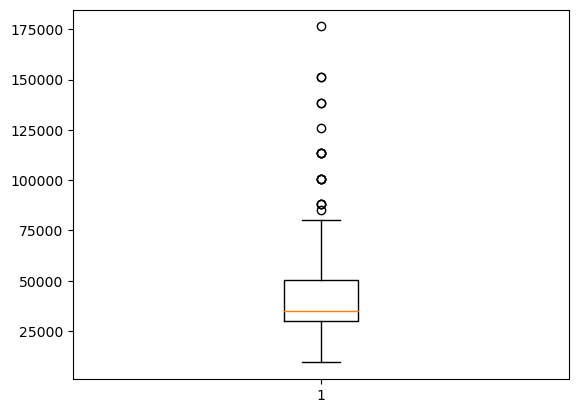

<Figure size 600x600 with 0 Axes>

In [61]:
plt.boxplot(df_salary_data['min_salary'])
fig = plt.figure(figsize =(6, 6))
plt.show()


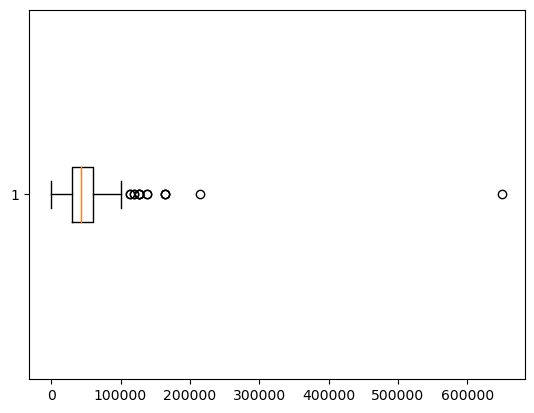

<Figure size 600x600 with 0 Axes>

In [62]:
plt.boxplot(df_salary_data['max_salary'], vert=False)
fig = plt.figure(figsize =(6, 6))
plt.show()

### Detecting outliers using Seaborn

In [63]:
import seaborn as sns

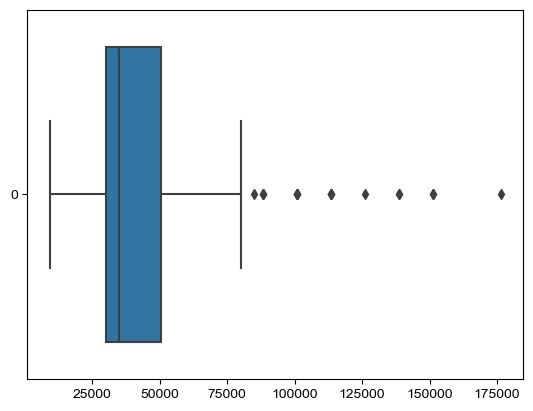

In [64]:
ax = sns.boxplot(data=df_salary_data['min_salary'], orient="h")#, palette="Set2") 
sns.set_theme(rc={'figure.figsize':(6,6)})


### Extracing outliers values 

### min_salary column

In [3]:

# finding the 1st quartile of min_salary 
q1_min = np.quantile(df_salary_data['min_salary'], 0.25)
 
# finding the 3rd quartile
q3_min = np.quantile(df_salary_data['min_salary'], 0.75)

# finding the iqr region
iqr_min = q3_min-q1_min

# finding upper and lower bound
upper_bound_min = q3_min+(1.5*iqr_min)
lower_bound_min = q1_min-(1.5*iqr_min)
# print(iqr_min, upper_bound_min, lower_bound_min)

# extracting values 
lower_bound_outliers_min_salary =  df_salary_data['min_salary'][(df_salary_data['min_salary'] <= lower_bound_min)]
upper_bound_outliers_min_salary  = df_salary_data['min_salary'][df_salary_data['min_salary'] >= upper_bound_min]

print(lower_bound_outliers_min_salary)
print(upper_bound_outliers_min_salary)


Series([], Name: min_salary, dtype: int64)
91     100800
94      88200
119    113400
133    100800
142    126000
154    113400
173    138600
174     85000
196     88200
216    151200
219    113400
231    100800
245    113400
246     88200
248    100800
272    176400
273    138600
275    151200
Name: min_salary, dtype: int64


### Droping Outliers from min_column

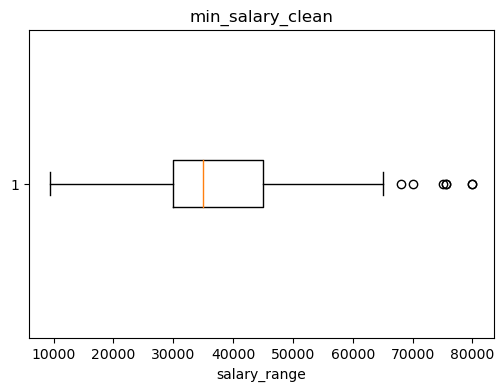

In [7]:
# boxplot of data after outliers removed

# Eliminating outliers 
min_outliers_clean = df_salary_data['min_salary'][(df_salary_data['min_salary'] >= lower_bound_min) &  
                                                (df_salary_data['min_salary'] <= upper_bound_min)] 

plt.figure(figsize=(6, 4))
plt.boxplot(min_outliers_clean, vert=False)
plt.title("min_salary_clean")
plt.xlabel("salary_range")
plt.show()


### max_salary column

In [4]:

# finding the 1st quartile of 
q1_max = np.quantile(df_salary_data['max_salary'], 0.25)
 
# finding the 3rd quartile
q3_max = np.quantile(df_salary_data['max_salary'], 0.75)

 
# finding the iqr region
iqr_max = q3_max-q1_max

# finding upper and lower bound
upper_bound_max = q3_max+(1.5*iqr_max)
lower_bound_max = q1_max-(1.5*iqr_max)
# print(iqr_max, upper_bound_max, lower_bound_max)

lower_bound_outliers_max_salary =  df_salary_data['max_salary'][(df_salary_data['max_salary'] <= lower_bound_max)]
upper_bound_outliers_max_salary  = df_salary_data['max_salary'][df_salary_data['max_salary'] >= upper_bound_max]

print(lower_bound_outliers_max_salary)
print(upper_bound_outliers_max_salary)


Series([], Name: max_salary, dtype: int64)
91     126000
133    113400
142    138600
154    126000
173    163800
191    650000
202    120000
203    120000
216    163800
219    113652
231    126000
245    138600
248    126000
272    214200
273    163800
Name: max_salary, dtype: int64


In [68]:
# Business Intelligence (BI) Data Analyst is the heighest paid  £55000 to £650000 per annum Permanent, full-time role
upper_bound_outliers_max_salary.max()


650000

### Droping Outliers from max_column

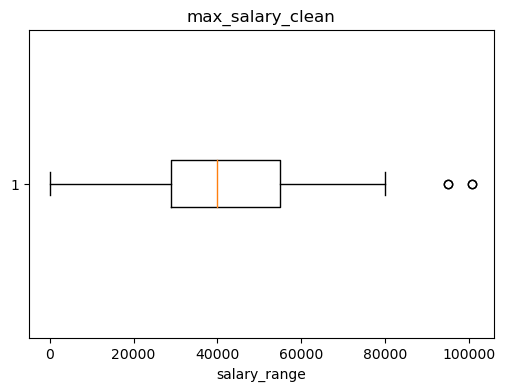

In [6]:
# boxplot of data after outliers removed

# Eliminating outliers 
max_outliers_clean = df_salary_data['max_salary'][(df_salary_data['max_salary'] >= lower_bound_max) &  
                                                (df_salary_data['max_salary'] <= upper_bound_max)] 

plt.figure(figsize=(6, 4))
plt.boxplot(max_outliers_clean, vert=False)
plt.title("max_salary_clean")
plt.xlabel("salary_range")
plt.show()


### Calculating the average of min_salary & max_salary 

In [8]:
# Outliers are removed, the data is normally distributed (evenly distributed) the mean is good indicator 
min_salary_average = min_outliers_clean.mean()
max_salary_average = max_outliers_clean.mean()

min_salary_median= min_outliers_clean.median()
max_salary_median= max_outliers_clean.median()

print('min salary median = ', int(min_salary_median))
print('min salary average = ',int(min_salary_average))

print('-----------------------------------------------')

print('max salary average = ', int(max_salary_average))
print('max salary median = ',int(max_salary_median))


min salary median =  35000
min salary average =  37946
-----------------------------------------------
max salary average =  40318
max salary median =  40000


## My analysis findings - Average Data Analyst Annual salary in England (UK)
- Average of means: mean of min_salary + mean of max_salary 
 - = 37946+ 40318 = 78264/2 = Average (mean) salary = £39,132
- Average of Medians:   median of min_salary + median of max_salary 
- = 35000 + 40000 = 75000/2 = Average median salary = £37,500

- Average (mean) salary = £39,132
- Average of Medians salary = £37,500


- I used the mean for my anaylysis because I removed outliers from the data hence a normal number distributions and the data has a low amount of outliers . The median is generally used to return the central tendency for skewed number distributions.


## Average Data Analyst Annual salary in the UK 

by https://www.reed.co.uk/average-salary/average-data-analyst-salary is £44,484 (taking Low £40,150 and High £53,638)

by https://uk.indeed.com/career/data-analyst/salaries is £35,630 

by https://uk.talent.com/salary?job=data+analyst is £35,000 per year (using Median £35,000, Low £28,000, High £55,000)


## Save clean min_salary and max_salary 

In [75]:

# max_salary column after cleaned from outliers conatins only 55 % (163) over half from 294 rows after duplicates removed 
# 31% from original 523 rows before duplicates removed
max_outliers_clean.info()


<class 'pandas.core.series.Series'>
Index: 163 entries, 0 to 279
Series name: max_salary
Non-Null Count  Dtype
--------------  -----
163 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [76]:
# min_salary column after cleaned from outliers conatins only 54 % (160) over half from 294 rows after duplicates removed  
# 30.5% from original 523 rows before duplicates removed
min_outliers_clean.info()


<class 'pandas.core.series.Series'>
Index: 160 entries, 0 to 279
Series name: min_salary
Non-Null Count  Dtype
--------------  -----
160 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [ ]:
# max_salary column after cleaned from outliers conatins only 55 % (163) over half from 294 rows after duplicates removed 
# 31% from original 523 rows before duplicates removed

# min_salary column after cleaned from outliers conatins only 54 % (160) over half from 294 rows after duplicates removed  
# 30.5% from original 523 rows before duplicates removed

### Saving  min_salary and max_salary WITHOUT outliers

In [259]:
pd.options.display.max_rows = None

In [105]:
len(max_outliers_clean)

163

In [260]:
max_outliers_clean.to_csv('max_salary_clean.csv', index=False)
min_outliers_clean.to_csv('min_salary_clean.csv', index=False)

In [103]:
max_outliers_clean.info()

<class 'pandas.core.series.Series'>
Index: 163 entries, 0 to 279
Series name: max_salary
Non-Null Count  Dtype
--------------  -----
163 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


### Saving min_salary and max_salary with outliers 

In [58]:
df_salary_data['max_salary'].head()


0     32000
3         0
30        0
85        0
86        0
Name: max_salary, dtype: int64

In [59]:
df_max = df_salary_data[df_salary_data['max_salary'] >3]
df_max.head(2)


,title,date,date_transformed,day_of_week,month,salary,salary_copy,min_salary,max_salary,working_hours,employer,location
0,Data Analyst,28 March,2024-03-28,Thursday,March,"£28,000 - £32,000 per annum",28000 - 32000 per annum,28000,32000,"Permanent, full-time",SES Water,Redhill
88,Data Analyst apprentice,17 April,2024-04-17,Wednesday,April,"£15,000 - £17,000 per annum",15000 - 17000 per annum,15000,17000,"Permanent, full-time",QA Ltd,Bristol


In [263]:
df_max_salary = df_max['max_salary']
df_max_salary.head(10)


0       32000
88      17000
90      78624
91     126000
92      35000
93      60000
98      28000
99      45000
100     45000
103     40000
Name: max_salary, dtype: int64

In [60]:
df_min = df_salary_data[df_salary_data['min_salary'] >3]
df_min.head(2)


,title,date,date_transformed,day_of_week,month,salary,salary_copy,min_salary,max_salary,working_hours,employer,location
0,Data Analyst,28 March,2024-03-28,Thursday,March,"£28,000 - £32,000 per annum",28000 - 32000 per annum,28000,32000,"Permanent, full-time",SES Water,Redhill
3,Data Analyst,9 April,2024-04-09,Tuesday,April,"£32,000 per annum",32000 per annum,32000,0,"Permanent, full-time",Anglian Water,Peterborough


In [61]:
df_min_salary = df_min['min_salary']
df_min_salary.head(10)


0      28000
3      32000
30     42000
85     22778
86     18000
88     15000
90     75600
91    100800
92     30000
93     30000
Name: min_salary, dtype: int64

### Save min_salary and max_salary with outliers 

In [266]:
df_max_salary.to_csv('max_salary_19.csv', index=False)
df_min_salary.to_csv('min_salary_19.csv', index=False)
